In [1]:
##Dataset = https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [2]:
##Amacımız araba almak isteyen kişinin istediği filtreleri filtrelemeleri yaparak bütçesine uygun bir araba almasını sağlamak.
#Bu sebeple öncelikle price prediction modeli oluşturup sonrasında filtreleme işlemleri yapacağız

# 1-)DATA UNDERSTANDING / VERİYİ ANLAMA

### Bu kısımda dataseti projeye aktarıyor , inceliyor ve basit derecede bilgi sahibi oluyoruz. Sonrasında bu bilgileri yorumluyoruz

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter 

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [4]:
df_clean = pd.read_csv('vehicles.csv')

In [5]:
df = df_clean.copy()

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.shape

(426880, 26)

In [8]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [10]:
df.nunique()

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

**Dataseti incelediğimiz zaman [cylinders,condition,drive,type] sütunlarının dikkate alınacak kadar null değer içerdiğini
data type ın çoğunlukla object olduğunu ve unique veri sayısını görüyoruz**

# 2-)EDA (Exploratory Data Analysis) - Keşifsel Veri Analizi
### Amacımız isminde de belirtildiği üzere veriyi keşfetmek ve veri hakkında daha detaylı bilgi sahibi olmak

In [11]:
#2.1 Öncelikle tamamen aynı olan satırları siliyoruz
df.drop_duplicates(inplace=True)

In [12]:
#2.2 Sonrasında kullanmayacağımız sütunları drop edelim

In [13]:
#url ,model vardı sildim test yapıyorum.

drop_columns = {"id","region","region_url","VIN","image_url","description","lat","long","posting_date","county","state","size","paint_color","url","model"}

df.drop(columns=drop_columns,axis=1,inplace=True)

In [14]:
# Drop işlemlerinden sonra df bu şekilde.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [15]:
#2.3 Df üzerindeki her bir sütunun unique veri sayısını ve verileri görmek için bir for döngüsü yazıyoruz.

for column in df.columns:
    print(f"kolon ismi :{column} -- uniuqe veri sayısı:{df[column].nunique()}\n uniuqe verileri: {df[column].unique()}\n**********************************************")

kolon ismi :price -- uniuqe veri sayısı:15655
 uniuqe verileri: [ 6000 11900 21000 ...  6328 19853 17873]
**********************************************
kolon ismi :year -- uniuqe veri sayısı:114
 uniuqe verileri: [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
**********************************************
kolon ismi :manufacturer -- uniuqe ver

In [16]:
#2.4 Artık df de gereksiz sütun yok şimdi var olan sütunlardaki NaN değerler farklı teknikler ile dolduracağız.
#    Sonrasında veride artık null değer olmadığı için hedef değişken analizi kısmına geçeceğiz her veri için 
#    grafikler çizip outlierları tespit edeceğiz ve bunları doğru yöntemler ile işleyeceğiz

=== NULL DEĞER ANALİZİ ===

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

=== NULL DEĞER YÜZDELERİ ===

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
dtype: float64


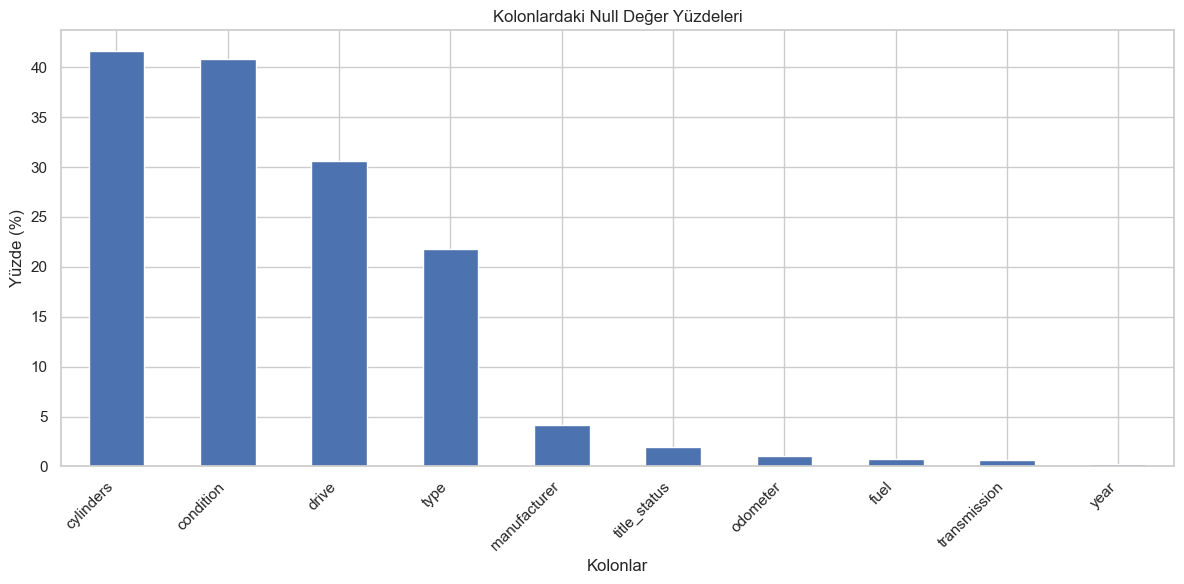

In [17]:
print("=== NULL DEĞER ANALİZİ ===\n")
print(df.isnull().sum())
print("\n=== NULL DEĞER YÜZDELERİ ===\n")
print((df.isnull().sum() / len(df)) * 100)


plt.figure(figsize=(12, 6))
null_percent = (df.isnull().sum() / len(df)) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent.plot(kind='bar')
plt.title('Kolonlardaki Null Değer Yüzdeleri')
plt.ylabel('Yüzde (%)')
plt.xlabel('Kolonlar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Yukarıdaki grafikte göründüğü üzere [cylinders,condition,drive,type] sütunlarının dikkat çekici şekilde null değerler içeriyor şimdi bu sütunlardaki null değerleri uygun yöntemler ile işleyecek ve hiçbir sütunda null kalmayacak şekilde ayarlayacağız.

In [18]:
#2.5 Null değerleri doldururken kategorik ve numeric olarak ayrı ayrı işleyeceğiz. Bunun sebebi kullandığımız groupby fonksiyonunda
#    kategorik değişkenler için mode'u numeric değerler için medianı kullanıcak olmamız.

In [19]:
groupbyColumns = ["cylinders","fuel","transmission","drive","condition"]

In [20]:
#2.6 Gözüktüğü üzere cylinders,fuel,transmission sütunlarında other değerleri var.
#    Bu kısımda şöyle bir yol izeyeceğiz arabanın marka ve modeli ile groupby işlemi 
#    yaparak other olan verileri dolduracağız.

for column in groupbyColumns:
    print("---------------------- \n")
    print(f"kolon ismi:({column}) = {df[column].value_counts()}")

---------------------- 

kolon ismi:(cylinders) = cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
---------------------- 

kolon ismi:(fuel) = fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
---------------------- 

kolon ismi:(transmission) = transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64
---------------------- 

kolon ismi:(drive) = drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64
---------------------- 

kolon ismi:(condition) = condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


In [21]:
#2.7 önce sütunlarımızdaki other değerleri null a çeviriyoruz

for column in groupbyColumns:
    df.loc[df[column].str.contains('other', case=False, na=False), column] = np.nan
    print(f"{column} kolonundaki other değer sayısı = {(df[column]=="other").sum()}")    

cylinders kolonundaki other değer sayısı = 0
fuel kolonundaki other değer sayısı = 0
transmission kolonundaki other değer sayısı = 0
drive kolonundaki other değer sayısı = 0
condition kolonundaki other değer sayısı = 0


In [22]:
#2.8 Aşşağıda gözüktüğü üzere other olan gruplar manufacturer ve type kolonlarına göre gruplandı
#    ve modelarına göre dolduruldu artık null ya da other değerimiz yok

for column in groupbyColumns:
    df[column] = df.groupby(["manufacturer","type"],dropna=False)[column].transform(
    lambda x:x.fillna(x.mode()[0]) if not x.mode().empty else x
 )
    df.dropna(subset=[column],inplace=True)
    print(f"{df[column].value_counts()}")


cylinders
6 cylinders     154031
8 cylinders     134306
4 cylinders     132010
5 cylinders       3117
10 cylinders      1513
3 cylinders       1107
12 cylinders       216
Name: count, dtype: int64
fuel
gas         389305
diesel       30134
hybrid        5168
electric      1675
Name: count, dtype: int64
transmission
automatic    400846
manual        25430
Name: count, dtype: int64
drive
4wd    196094
fwd    149014
rwd     81140
Name: count, dtype: int64
condition
excellent    225486
good         170475
like new      21196
fair           6769
new            1713
salvage         601
Name: count, dtype: int64


In [23]:
#2.9 Cylinders sütunundaki cylinders yazısı bir şey ifade etmiyor ve numeric olmaya daha uygun bu sebeple öncelikle
#    cylinders yazısını atıyor sonrasında kolonun type nı numerice çeviriyoruz.

df["cylinders"] = df["cylinders"].str.split().str[0].astype(int)
print("Artık silindir sütunu numeric halde şu şekilde:")
df["cylinders"].value_counts()

Artık silindir sütunu numeric halde şu şekilde:


cylinders
6     154013
8     134288
4     131992
5       3117
10      1507
3       1107
12       216
Name: count, dtype: int64

In [24]:
#2.10 Kategorik değişkenler ile işimiz bitti ve artık sırada sayısal değişkenler var.
#     Öncelikle year sütunundaki null değerleri manufacturer sütunu ile gruplayıp
#     null değerleri medianı ile dolduruyoruz.
df["year"] = df.groupby("manufacturer",dropna=False)["year"].transform(
    lambda x: x.fillna(x.median())
)

df.dropna(subset=["manufacturer"],inplace=True)

In [25]:
#2.11 Odometer fiyatı doğrudan etkileyeceği için direkt null değerleri doldurursak data leakge riski çok yüksek fakat
#     doldurmassak sonrasında oluşturacağımız grafikler bize doğru sonuçlar vermez bu sebeple geçiçi bir df_eda kopyası
#     oluşturacağız ilerleyen kısımlarda bu kopyayı güncelleyerek grafiklerde kullanacağız fakat modeli eğittiğimiz kısımlarda
#     asla df_eda kullanılmayacak data leakage sebebiyet vereceği için!

df_eda = df.copy()

df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"],dropna=False)["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

df_eda.dropna(subset=["odometer"],inplace=True)

In [26]:
#2.12 Title status kolonu için ise gruplama yapmadan mode ile doldurma işlemi gerçekleştiriyoruz.

df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

In [27]:
#2.13 Type kısmındaki boşlukları doldurmak için anahtar kelime kullanan bir fonksiyon yazdık bu fonksiyon sayesinde belirli kelimeler algılandığında
#     type kolonu otomatik bir şekilde dolduruluyor.

def fill_type_from_model_column(df, df_with_model):
    """
    df_with_model'deki model kolonunu kullanarak df'in type kolonunu doldur
    
    Parameters:
    -----------
    df : DataFrame
        Type'ı doldurulacak DataFrame (model kolonu yok)
    df_with_model : DataFrame
        Model kolonuna sahip DataFrame
        
    Returns:
    --------
    df : DataFrame with filled 'type' column
    """
    print("=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===\n")
    
    # Model bilgisini geçici ekle
    if len(df) == len(df_with_model):
        df['model_temp'] = df_with_model['model'].values
    else:
        # Index bazlı merge
        df = df.merge(
            df_with_model[['model']], 
            left_index=True, 
            right_index=True, 
            how='left',
            suffixes=('', '_temp')
        )
        if 'model_temp' not in df.columns:
            df.rename(columns={'model': 'model_temp'}, inplace=True)
    
    print(f"Başlangıç type null: {df['type'].isnull().sum()}")
    
    # Extraction fonksiyonu
    def extract_type(row):
        if pd.notna(row['type']):
            return row['type']
        
        if pd.isna(row['model_temp']):
            return None
        
        model = str(row['model_temp']).lower()
        
        # Comprehensive keywords
        type_keywords = {
            'pickup': ['f-150', 'f-250', 'f-350', 'silverado', 'sierra', 'ram', 
                      'tundra', 'tacoma', 'ranger', 'colorado', 'frontier', 'titan'],
            'SUV': ['4runner', 'explorer', 'tahoe', 'suburban', 'highlander', 
                    'pilot', 'pathfinder', 'expedition', 'durango', 'traverse',
                    'cr-v', 'rav4', 'rogue', 'equinox', 'escape'],
            'sedan': ['camry', 'accord', 'civic', 'corolla', 'altima', 'sentra',
                     'malibu', 'fusion', 'impala', 'optima', 'sonata', 'elantra'],
            'coupe': ['mustang', 'camaro', 'corvette', 'challenger', 'charger',
                     '370z', '350z', 'miata', 'brz', 'gt-r'],
            'van': ['odyssey', 'sienna', 'pacifica', 'caravan', 'quest', 'town'],
            'hatchback': ['golf', 'focus', 'fiesta', 'fit', 'yaris', 'prius']
        }
        
        for vehicle_type, keywords in type_keywords.items():
            if any(keyword in model for keyword in keywords):
                return vehicle_type
        
        return None
    
    # Apply
    print("1) Model isminden type çıkarılıyor...")
    df['type'] = df.apply(extract_type, axis=1)
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Manufacturer bazlı mode
    print("2) Manufacturer bazlı mode...")
    df['type'] = df.groupby('manufacturer')['type'].transform(
        lambda x: x.fillna(x.mode()[0]) if not x.mode().empty and len(x.dropna()) > 0 else x
    )
    print(f"   Sonrası null: {df['type'].isnull().sum()}")
    
    # Unknown
    print("3) Kalan null'lar 'unknown' yapılıyor...")
    df['type'].fillna('unknown', inplace=True)
    print(f"   Final null: {df['type'].isnull().sum()}")
    
    # Temizlik
    df = df.drop('model_temp', axis=1)
    
    print("\nType doldurma tamamlandı!")
    print("\nType dağılımı:")
    print(df['type'].value_counts())
    
    return df

# Kullanım
df = fill_type_from_model_column(df, df_clean)

=== TYPE DOLDURMA (MODEL BİLGİSİ İLE) ===

Başlangıç type null: 86295
1) Model isminden type çıkarılıyor...
   Sonrası null: 49988
2) Manufacturer bazlı mode...
   Sonrası null: 0
3) Kalan null'lar 'unknown' yapılıyor...
   Final null: 0

Type doldurma tamamlandı!

Type dağılımı:
type
sedan          117634
SUV             90340
pickup          74027
truck           33492
other           21246
coupe           20649
hatchback       17236
van             10720
wagon           10532
convertible      7152
mini-van         4682
offroad           570
bus               314
Name: count, dtype: int64


In [28]:
df.isna().sum()

price              0
year               0
manufacturer       0
condition          0
cylinders          0
fuel               0
odometer        4151
title_status       0
transmission       0
drive              0
type               0
dtype: int64

In [29]:
df['odometer'].fillna(df['odometer'].median(), inplace=True)

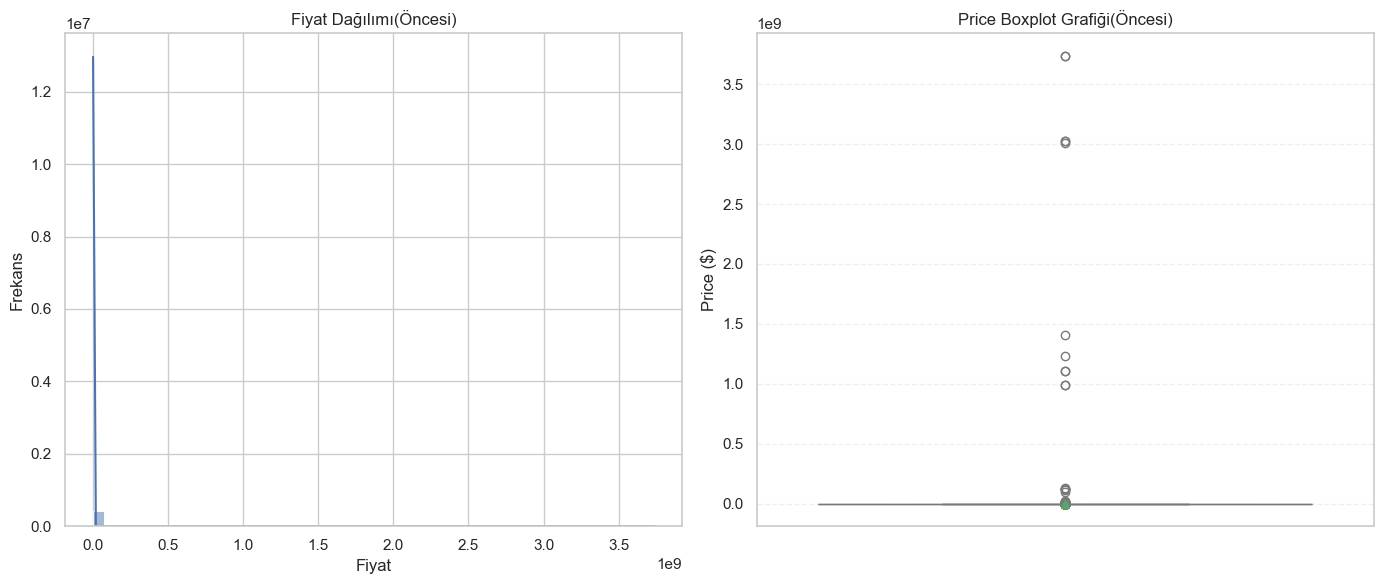

In [30]:
#2.14 Artık kolonlarımızda null değerler olmadığına göre kolonları hem frekansları hemde diğer kolonlarla ilişkileirni görmek
#     için grafikler oluşturacak ve yorumlayacağız.Öncelikle hedef değişkenimiz olan price kolonunun frekansını görmek için bir
#     histogram grafiği ve outlier değerleri inceleyebilmek için boxplot grafiği oluşturuyoruz.

plt.figure(figsize=(14,6))  

plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Öncesi)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")

plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Öncesi)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


In [31]:
#2.15 Grafik gözüktüğü üzere mantıksız bir şekilde bunun sebebi outlier değerler olabilir bunu incelememiz ve bu sorunu çözmemiz gerekiyor.

print(df["price"].describe())

count    4.085940e+05
mean     7.706622e+04
std      1.244890e+07
min      0.000000e+00
25%      5.975000e+03
50%      1.398000e+04
75%      2.599900e+04
max      3.736929e+09
Name: price, dtype: float64


In [32]:
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count       408594.000
mean         77066.218
std       12448895.834
min              0.000
25%           5975.000
50%          13980.000
75%          25999.000
max     3736928711.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 En YÜKSEK 20 fiyat:
[3736928711 3736928711 3024942282 3024942282 3009548743 1410065407
 1234567890 1111111111 1111111111  987654321  987654321  135008900
  123456789  123456789  123456789  123456789  113456789   99999999
   25003000   17000000]

 Fiyat Aralıkları:
$0 - $500 arası:      40,039 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,886 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,239 araba
$100,000 - $500,000:     441 araba
$500,000+:              57 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             31,406 araba
$1-100 arası:           3,138 araba
$1,000,000+:            51 arab

In [33]:
#2.16 Yukarıda gözüktüğü üzere veri setinde 0 dolar ve milyar değerlere sahip olan arabalar var (0 ve 3736928711 gibi)
#     bizim amacımız gerçek dünya verileri ile olabildiğince orantılı bir model geliştirmek olduğundan 500.000 dolar
#     üzeri ve 500 dolar altı araçları df den sileceğiz. 

In [34]:
df.drop(df[(df['price'] < 500) | (df['price'] > 500000)].index, inplace=True)

In [35]:
# En düşük ve en yüksek fiyatlara bak
print("="*60)
print("PRICE OUTLIER ANALİZİ")
print("="*60)

print("\n Temel İstatistikler:")
pd.options.display.float_format = '{:.3f}'.format
print(df['price'].describe())

print("\n En DÜŞÜK 20 fiyat:")
print(df['price'].nsmallest(20).values)

print("\n En YÜKSEK 20 fiyat:")
print(df['price'].nlargest(20).values)

print("\n Fiyat Aralıkları:")
print(f"$0 - $500 arası:      {len(df[df['price'] < 500]):,} araba")
print(f"$500 - $1,000:        {len(df[(df['price'] >= 500) & (df['price'] < 1000)]):,} araba")
print(f"$1,000 - $5,000:        {len(df[(df['price'] >= 1000) & (df['price'] < 5000)]):,} araba")
print(f"$5,000 - $20,000:       {len(df[(df['price'] >= 5000) & (df['price'] < 20000)]):,} araba")
print(f"$20,000 - $50,000:      {len(df[(df['price'] >= 20000) & (df['price'] < 50000)]):,} araba")
print(f"$50,000 - $100,000:     {len(df[(df['price'] >= 50000) & (df['price'] < 100000)]):,} araba")
print(f"$100,000 - $500,000:     {len(df[(df['price'] >= 100000) & (df['price'] < 500000)]):,} araba")
print(f"$500,000+:              {len(df[df['price'] >= 500000]):,} araba")

print("\n Mantıksız Fiyatlar:")
print(f"$0 fiyatlı:             {len(df[df['price'] == 0]):,} araba")
print(f"$1-100 arası:           {len(df[(df['price'] > 0) & (df['price'] <= 100)]):,} araba")
print(f"$1,000,000+:            {len(df[df['price'] >= 1000000]):,} araba")
print("="*60)

PRICE OUTLIER ANALİZİ

 Temel İstatistikler:
count   368498.000
mean     19250.392
std      14854.130
min        500.000
25%       7900.000
50%      15950.000
75%      27990.000
max     449500.000
Name: price, dtype: float64

 En DÜŞÜK 20 fiyat:
[500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500 500
 500 500]

 En YÜKSEK 20 fiyat:
[449500 425000 349999 347999 304995 304995 304995 290000 289995 289900
 255000 244999 244999 239995 239995 239900 239900 229500 229500 229500]

 Fiyat Aralıkları:
$0 - $500 arası:      0 araba
$500 - $1,000:        3,754 araba
$1,000 - $5,000:        46,373 araba
$5,000 - $20,000:       175,886 araba
$20,000 - $50,000:      130,805 araba
$50,000 - $100,000:     11,239 araba
$100,000 - $500,000:     441 araba
$500,000+:              0 araba

 Mantıksız Fiyatlar:
$0 fiyatlı:             0 araba
$1-100 arası:           0 araba
$1,000,000+:            0 araba


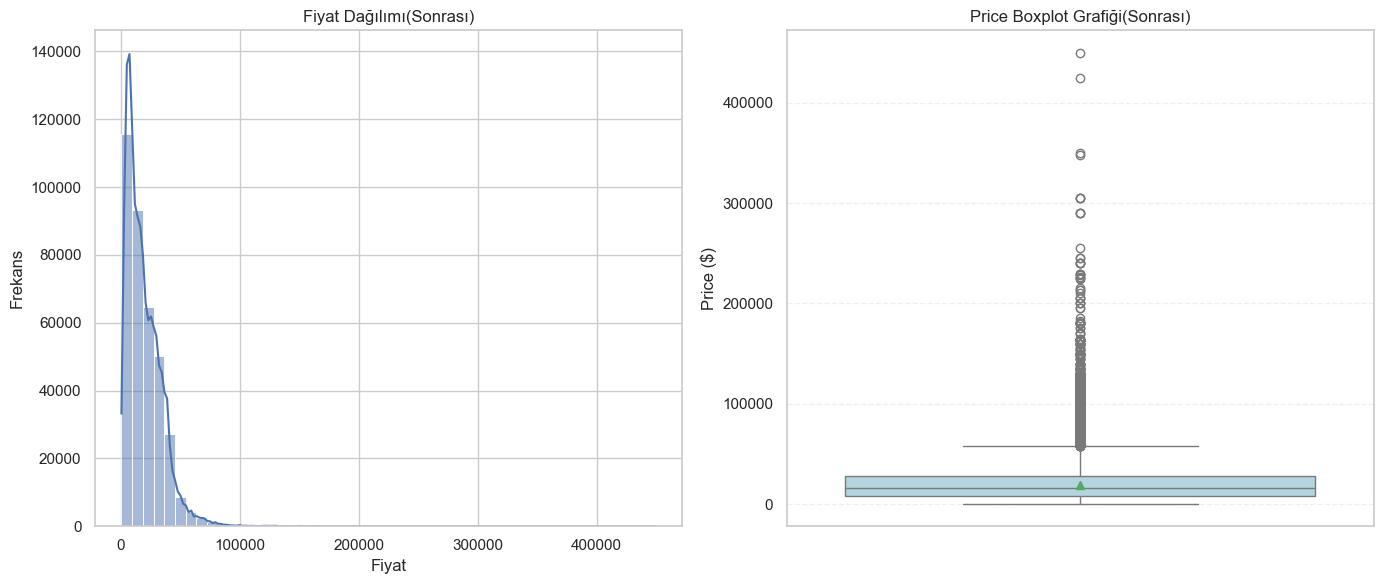

In [36]:
#2.17 Sonrasında aşşağıdaki grafikte gözüktüğü üzere grafiklerimiz düzeldi.

plt.figure(figsize=(14,6))  


plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Fiyat Dağılımı(Sonrası)")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")


plt.subplot(1, 2, 2)  
sns.boxplot(data=df, y="price", color="lightblue", showmeans=True)
plt.title("Price Boxplot Grafiği(Sonrası)")
plt.ylabel('Price ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()  
plt.show()


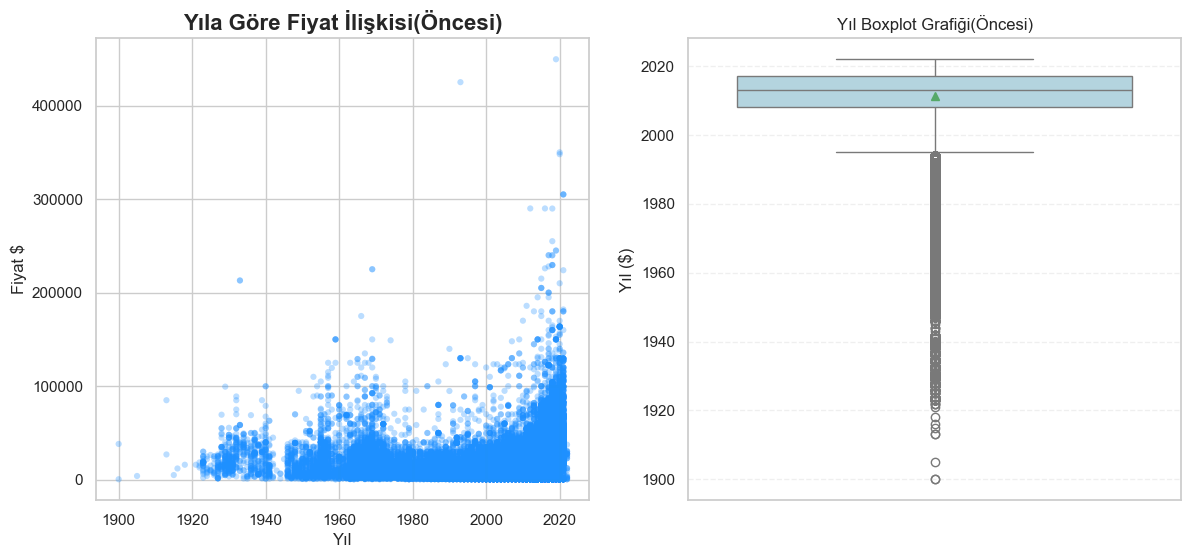

In [37]:
#2.18 Şimdi price kolonu outlierlerdan temizlendiği için diğer kolonlarla karşılaştırıp
#     istem dışı bir durum olup olmadığına bakacağız.

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Öncesi)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Öncesi)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
#plt.show()

In [38]:
#2.19 1980 den daha yaşlı araçlar antika sayılabilir hurda olabilir bu sebeple fiyat aralığı çok saçma ve bizim amacımız olan
#     güncel arabaların fiyat tahmini amacına yardımcı olmuyor bu sebeple 1980 den daha önce üretilmiş arabaları df den siliyoruz. 
df = df[df["year"]>=1980]

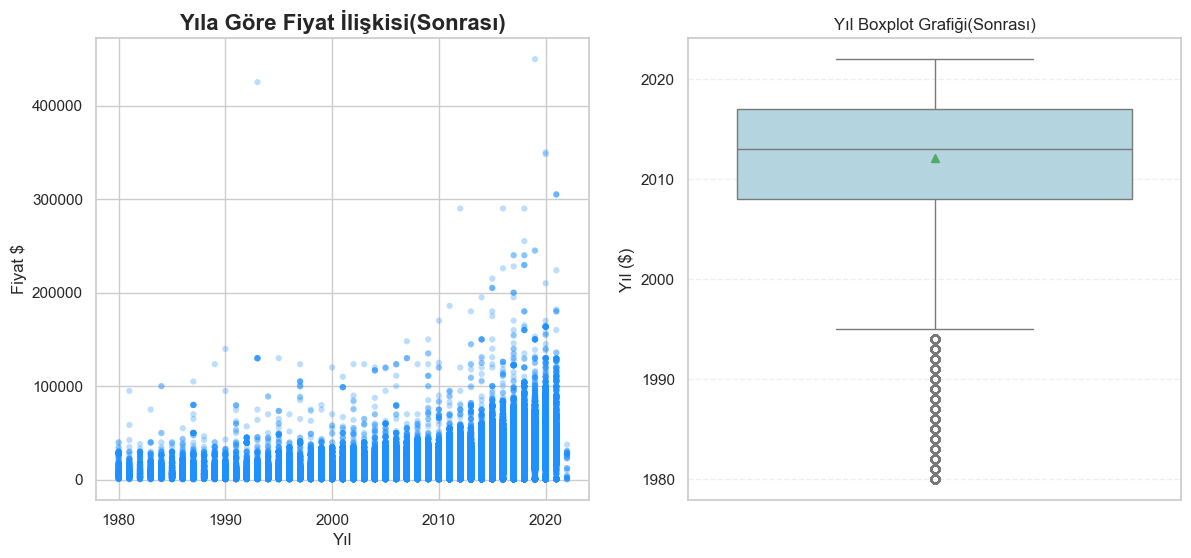

In [39]:
#2.20 Sonrasında gözüktüğü üzere daha temiz ve tutarlı grafikler elde ediyoruz.
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(df["year"],df["price"],
            alpha=0.3 , s=20 ,color="dodgerblue" , edgecolors="none")
plt.title('Yıla Göre Fiyat İlişkisi(Sonrası)', 
          fontsize=16, weight='bold')
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Fiyat $', fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="year", color="lightblue", showmeans=True)
plt.title("Yıl Boxplot Grafiği(Sonrası)")
plt.ylabel('Yıl ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.show()

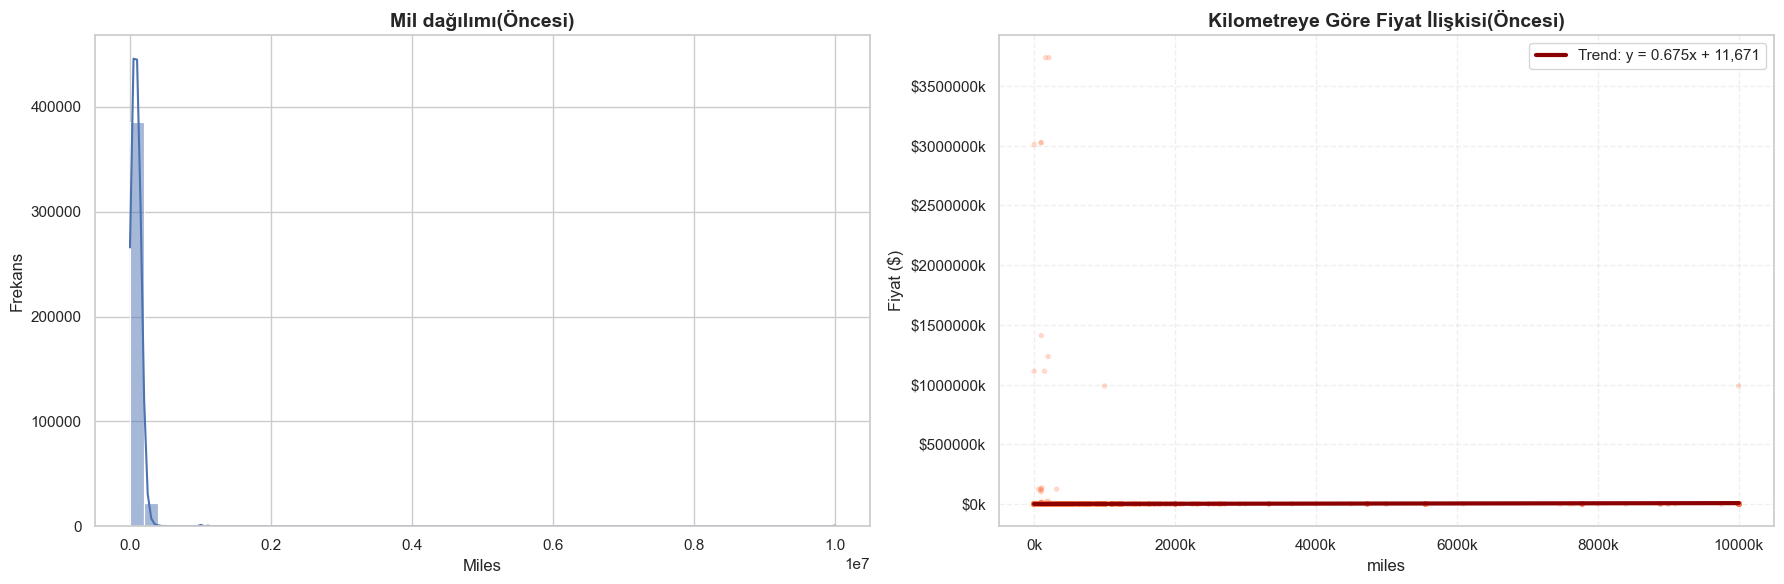

In [40]:
#2.21 Mil dağılımının frekansını ve fiyat ile ilişkisini görmek istiyoruz bunu yaparken önceden kaydettiğimiz df_eda değişkenini kullanacağız

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Öncesi)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Öncesi)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

# Formatter fonksiyonları
def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

# Sağ grafiğe formatter uygula
axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

In [41]:
#2.22 Grafik düzgün gözükmüyor bu sebeple outlier analizi yapacağız.

In [42]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count     362110.000
mean       96306.243
std       138881.239
min            0.000
25%        39380.000
50%        88199.000
75%       136285.000
max     10000000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[10000000. 10000000. 10000000. 10000000. 10000000. 10000000. 10000000.
 10000000.  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.
  9999999.  9999999.  9999999.  9999999.  9999999.  9999999.]

EXTREME DEĞERLER:
300k+ miles: 1,903 araba (0.53%)
400k+ miles: 656 araba (0.18%)
500k+ miles: 517 araba (0.14%)
1M+ miles: 247 araba (0.07%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 743 araba
0-1000 miles: 5,978 araba
1000-5000 miles: 6,537 araba


In [43]:
#2.23 300.000 mil 482.803 kilometre yapar bu değerin üstündeki araçlar hurda olmaya daha meilli olduğu için
#     ve bu verileri azınlıkta olduğu için (yaklaşık %1) 300.000 mil üzeri araçları df den siliyoruz. 

print(f"300.000 milden yüksek araç sayısı:{len(df[df["odometer"] > 300000])}")

df = df[df["odometer"]<=300000]


print("\ndf_eda güncelleniyor...")
df_eda = df.copy()
df_eda["odometer"] = df_eda.groupby(["manufacturer","type","year"])["odometer"].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)
if df_eda['odometer'].isnull().sum() > 0:
    df_eda['odometer'].fillna(df_eda['odometer'].median(), inplace=True)
print(f"df_eda güncellendi")

300.000 milden yüksek araç sayısı:1712

df_eda güncelleniyor...
df_eda güncellendi


In [44]:
# ========================================
# ODOMETER OUTLIER ANALİZİ
# ========================================
print("="*70)
print("ODOMETER (KİLOMETRE) OUTLIER ANALİZİ")
print("="*70)

print("\n Temel İstatistikler:")
print(df['odometer'].describe())

# En yüksek değerler
print(f"\nEn YÜKSEK 20 odometer değeri:")
print(df['odometer'].nlargest(20).values)

# Extreme değerlerin dağılımı
print(f"\nEXTREME DEĞERLER:")
print(f"300k+ miles: {len(df[df['odometer'] >= 300000]):,} araba ({len(df[df['odometer'] >= 300000])/len(df)*100:.2f}%)")
print(f"400k+ miles: {len(df[df['odometer'] >= 400000]):,} araba ({len(df[df['odometer'] >= 400000])/len(df)*100:.2f}%)")
print(f"500k+ miles: {len(df[df['odometer'] >= 500000]):,} araba ({len(df[df['odometer'] >= 500000])/len(df)*100:.2f}%)")
print(f"1M+ miles: {len(df[df['odometer'] >= 1000000]):,} araba ({len(df[df['odometer'] >= 1000000])/len(df)*100:.2f}%)")

# Alt taraf outlier kontrolü
print(f"\nDÜŞÜK DEĞERLER:")
print(f"0 miles (Yeni araba): {len(df[df['odometer'] == 0]):,} araba")
print(f"0-1000 miles: {len(df[df['odometer'] < 1000]):,} araba")
print(f"1000-5000 miles: {len(df[(df['odometer'] >= 1000) & (df['odometer'] < 5000)]):,} araba")

print("="*70)

ODOMETER (KİLOMETRE) OUTLIER ANALİZİ

 Temel İstatistikler:
count   360398.000
mean     92642.972
std      61571.229
min          0.000
25%      39191.000
50%      87839.000
75%     135495.000
max     300000.000
Name: odometer, dtype: float64

En YÜKSEK 20 odometer değeri:
[300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000. 300000.
 300000. 300000.]

EXTREME DEĞERLER:
300k+ miles: 191 araba (0.05%)
400k+ miles: 0 araba (0.00%)
500k+ miles: 0 araba (0.00%)
1M+ miles: 0 araba (0.00%)

DÜŞÜK DEĞERLER:
0 miles (Yeni araba): 743 araba
0-1000 miles: 5,978 araba
1000-5000 miles: 6,537 araba


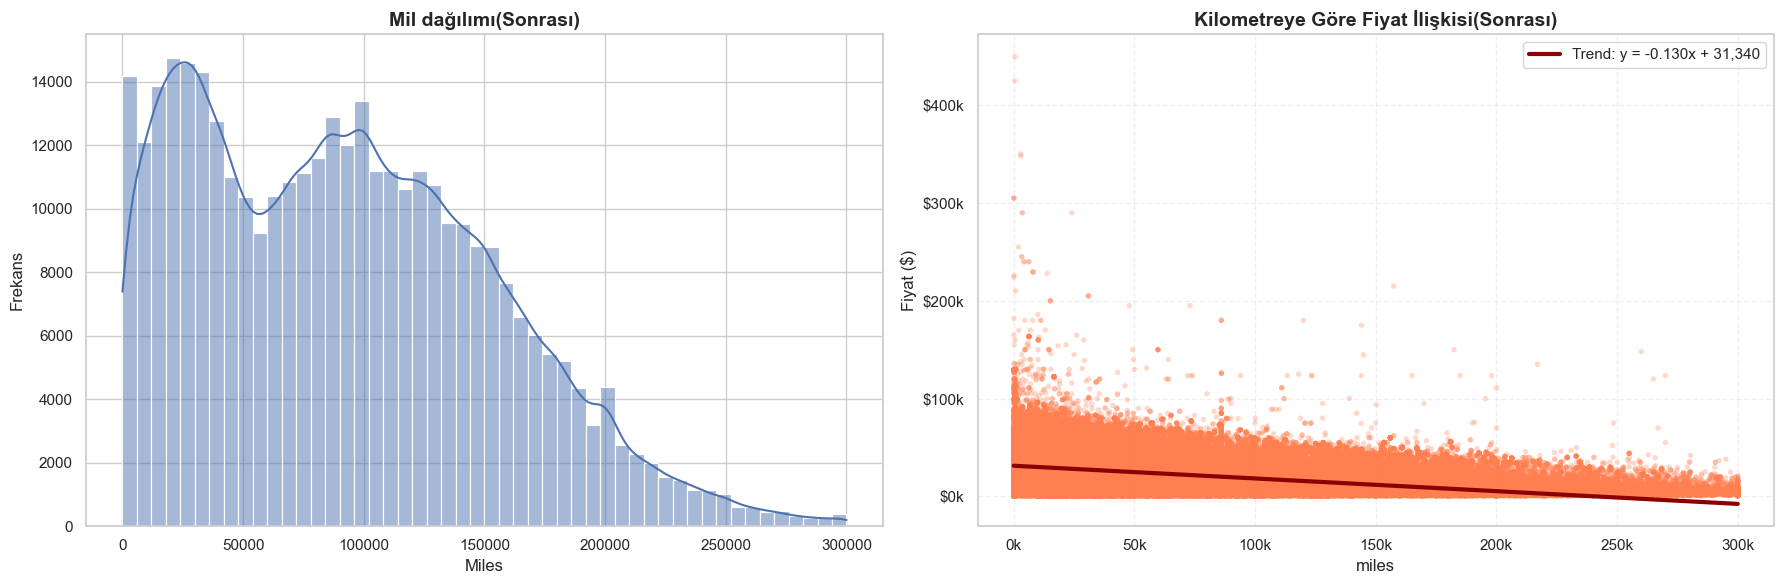

In [45]:
#2.24 Artık gözüktüğü üzere daha tutarlı ve güncel araba fiyat tahmini için daha verimli tablolara sahibiz.

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(df_eda['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Mil dağılımı(Sonrası)", fontsize=14, weight='bold')
axes[0].set_xlabel("Miles", fontsize=12)
axes[0].set_ylabel("Frekans", fontsize=12)


axes[1].scatter(df_eda['odometer'], df_eda['price'], 
                alpha=0.3, s=15, color='coral', edgecolors='none')

# Trend line
z = np.polyfit(df_eda['odometer'], df_eda['price'], 1)
p = np.poly1d(z)
axes[1].plot(sorted(df_eda['odometer'].unique()), 
             p(sorted(df_eda['odometer'].unique())), 
             color='darkred', linewidth=3, 
             label=f'Trend: y = {z[0]:.3f}x + {z[1]:,.0f}')

axes[1].set_title('Kilometreye Göre Fiyat İlişkisi(Sonrası)', fontsize=14, weight='bold')
axes[1].set_xlabel('miles', fontsize=12)
axes[1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(fontsize=11, loc='upper right')

def miles_formatter(x, p):
    return f'{x/1000:.0f}k'

def price_formatter(x, p):
    return f'${x/1000:.0f}k'

axes[1].xaxis.set_major_formatter(FuncFormatter(miles_formatter))
axes[1].yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.tight_layout()
plt.show()

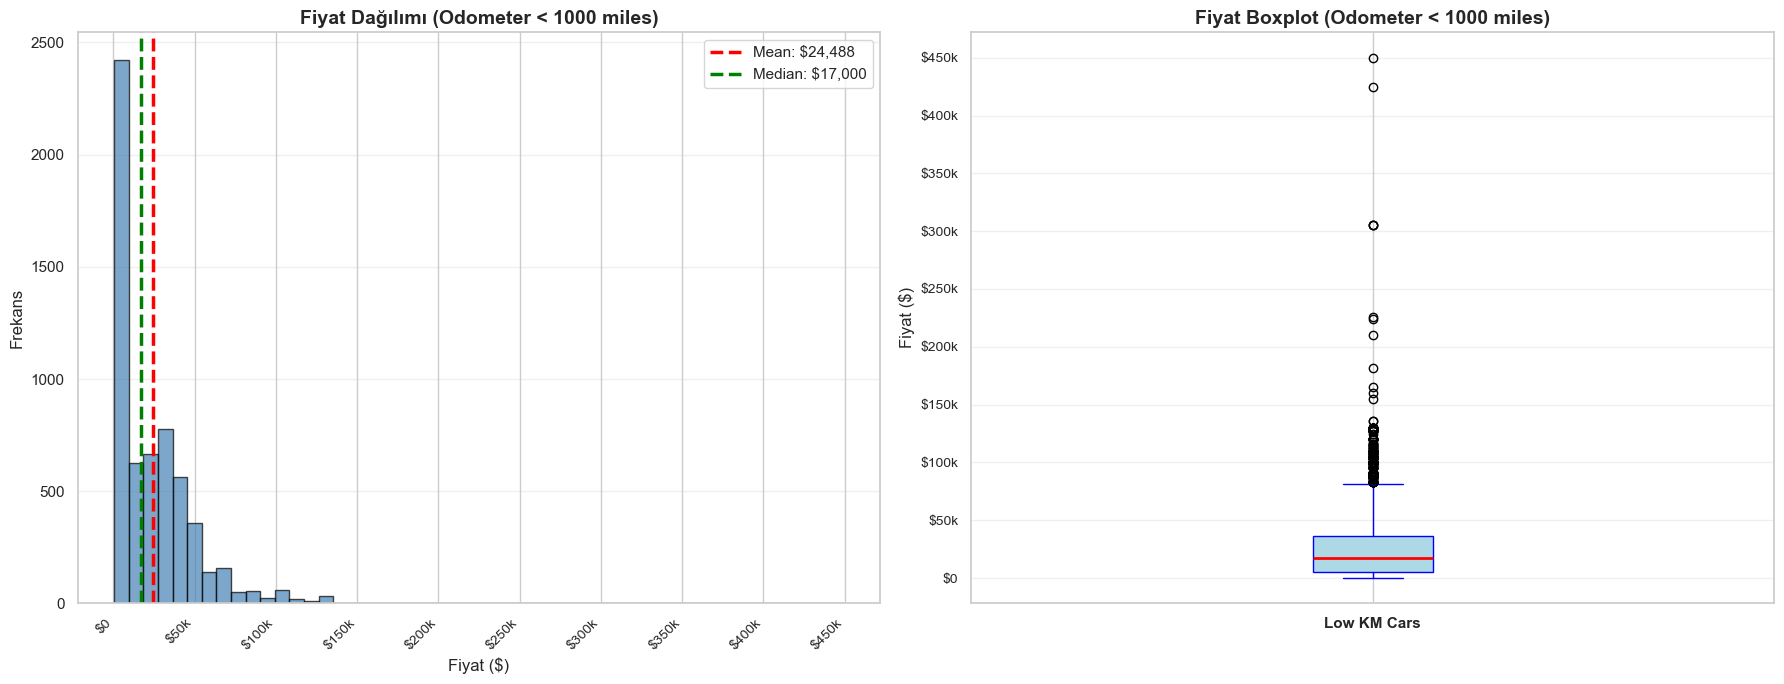

DÜŞÜK KM ARABALAR ANALİZİ (Odometer < 1000 miles)
Toplam araba sayısı: 5,978
Yüzde: 1.66%

Ortalama fiyat: $24,488
Median fiyat: $17,000
Min fiyat: $500
Max fiyat: $449,500
Std: $26,565

Ortalama yıl: 2013

En popüler manufacturer:
manufacturer
ford         1152
chevrolet    1056
toyota        402
jeep          389
dodge         271
Name: count, dtype: int64


In [46]:
# ============================================================================
# LOW KM CARS ANALİZİ (<1000 miles) - OUTLIER'LAR KORUNUYOR
# ============================================================================

low_km_cars = df[df['odometer'] < 1000]

# ============================================================================
# GRAFİKLER (OKUNUR VE DÜZGÜN)
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# ============================================================================
# 1) Histogram (Sol)
# ============================================================================
axes[0].hist(low_km_cars['price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Mean ve Median çizgileri
axes[0].axvline(low_km_cars['price'].mean(), color='red', linestyle='--', 
                linewidth=2.5, label=f'Mean: ${low_km_cars["price"].mean():,.0f}')
axes[0].axvline(low_km_cars['price'].median(), color='green', linestyle='--', 
                linewidth=2.5, label=f'Median: ${low_km_cars["price"].median():,.0f}')

# Başlık ve etiketler
axes[0].set_title('Fiyat Dağılımı (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[0].set_xlabel('Fiyat ($)', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)

# Legend
axes[0].legend(fontsize=11, loc='upper right')

# Grid
axes[0].grid(axis='y', alpha=0.3)

# X ekseni etiketleri (MANUEL - OKUNUR)
axes[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[0].set_xticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], 
                        rotation=45, ha='right', fontsize=10)

# ============================================================================
# 2) Boxplot (Sağ)
# ============================================================================
bp = axes[1].boxplot(low_km_cars['price'], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='red', linewidth=2))

# Başlık ve etiketler
axes[1].set_title('Fiyat Boxplot (Odometer < 1000 miles)', 
                  fontsize=14, weight='bold')
axes[1].set_ylabel('Fiyat ($)', fontsize=12)

# Grid
axes[1].grid(axis='y', alpha=0.3)

# Y ekseni etiketleri (MANUEL - OKUNUR)
axes[1].set_yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
axes[1].set_yticklabels(['$0', '$50k', '$100k', '$150k', '$200k', '$250k', 
                         '$300k', '$350k', '$400k', '$450k'], fontsize=10)

# X ekseni
axes[1].set_xticklabels(['Low KM Cars'], fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*70)
print("DÜŞÜK KM ARABALAR ANALİZİ (Odometer < 1000 miles)")
print("="*70)
print(f"Toplam araba sayısı: {len(low_km_cars):,}")
print(f"Yüzde: {len(low_km_cars)/len(df)*100:.2f}%")

print(f"\nOrtalama fiyat: ${low_km_cars['price'].mean():,.0f}")
print(f"Median fiyat: ${low_km_cars['price'].median():,.0f}")
print(f"Min fiyat: ${low_km_cars['price'].min():,.0f}")
print(f"Max fiyat: ${low_km_cars['price'].max():,.0f}")
print(f"Std: ${low_km_cars['price'].std():,.0f}")

print(f"\nOrtalama yıl: {low_km_cars['year'].mean():.0f}")

print(f"\nEn popüler manufacturer:")
print(low_km_cars['manufacturer'].value_counts().head(5))
print("="*70)

In [47]:
#2.25 Numeric değerlerin analizlerini yaptık outlier değerleri tespit edip sildik artık sırada kategorik değişkenler var.
#     Öncelikle genel bir yorum yapabilmek için her bir kategorik değişken için grafik oluşturucağız. 

KATEGORIK DEGISKENLER GENEL BAKIS

Toplam kategorik degisken: 7
Degiskenler: ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']

    Degisken  Unique  Total  Null En Populer  En Populer Adet En Populer %
manufacturer      41 360398     0       ford            61519        17.1%
   condition       6 360398     0  excellent           184721        51.3%
        fuel       4 360398     0        gas           332210        92.2%
title_status       6 360398     0      clean           348409        96.7%
transmission       2 360398     0  automatic           342120        94.9%
       drive       3 360398     0        4wd           170427        47.3%
        type      13 360398     0      sedan           103865        28.8%


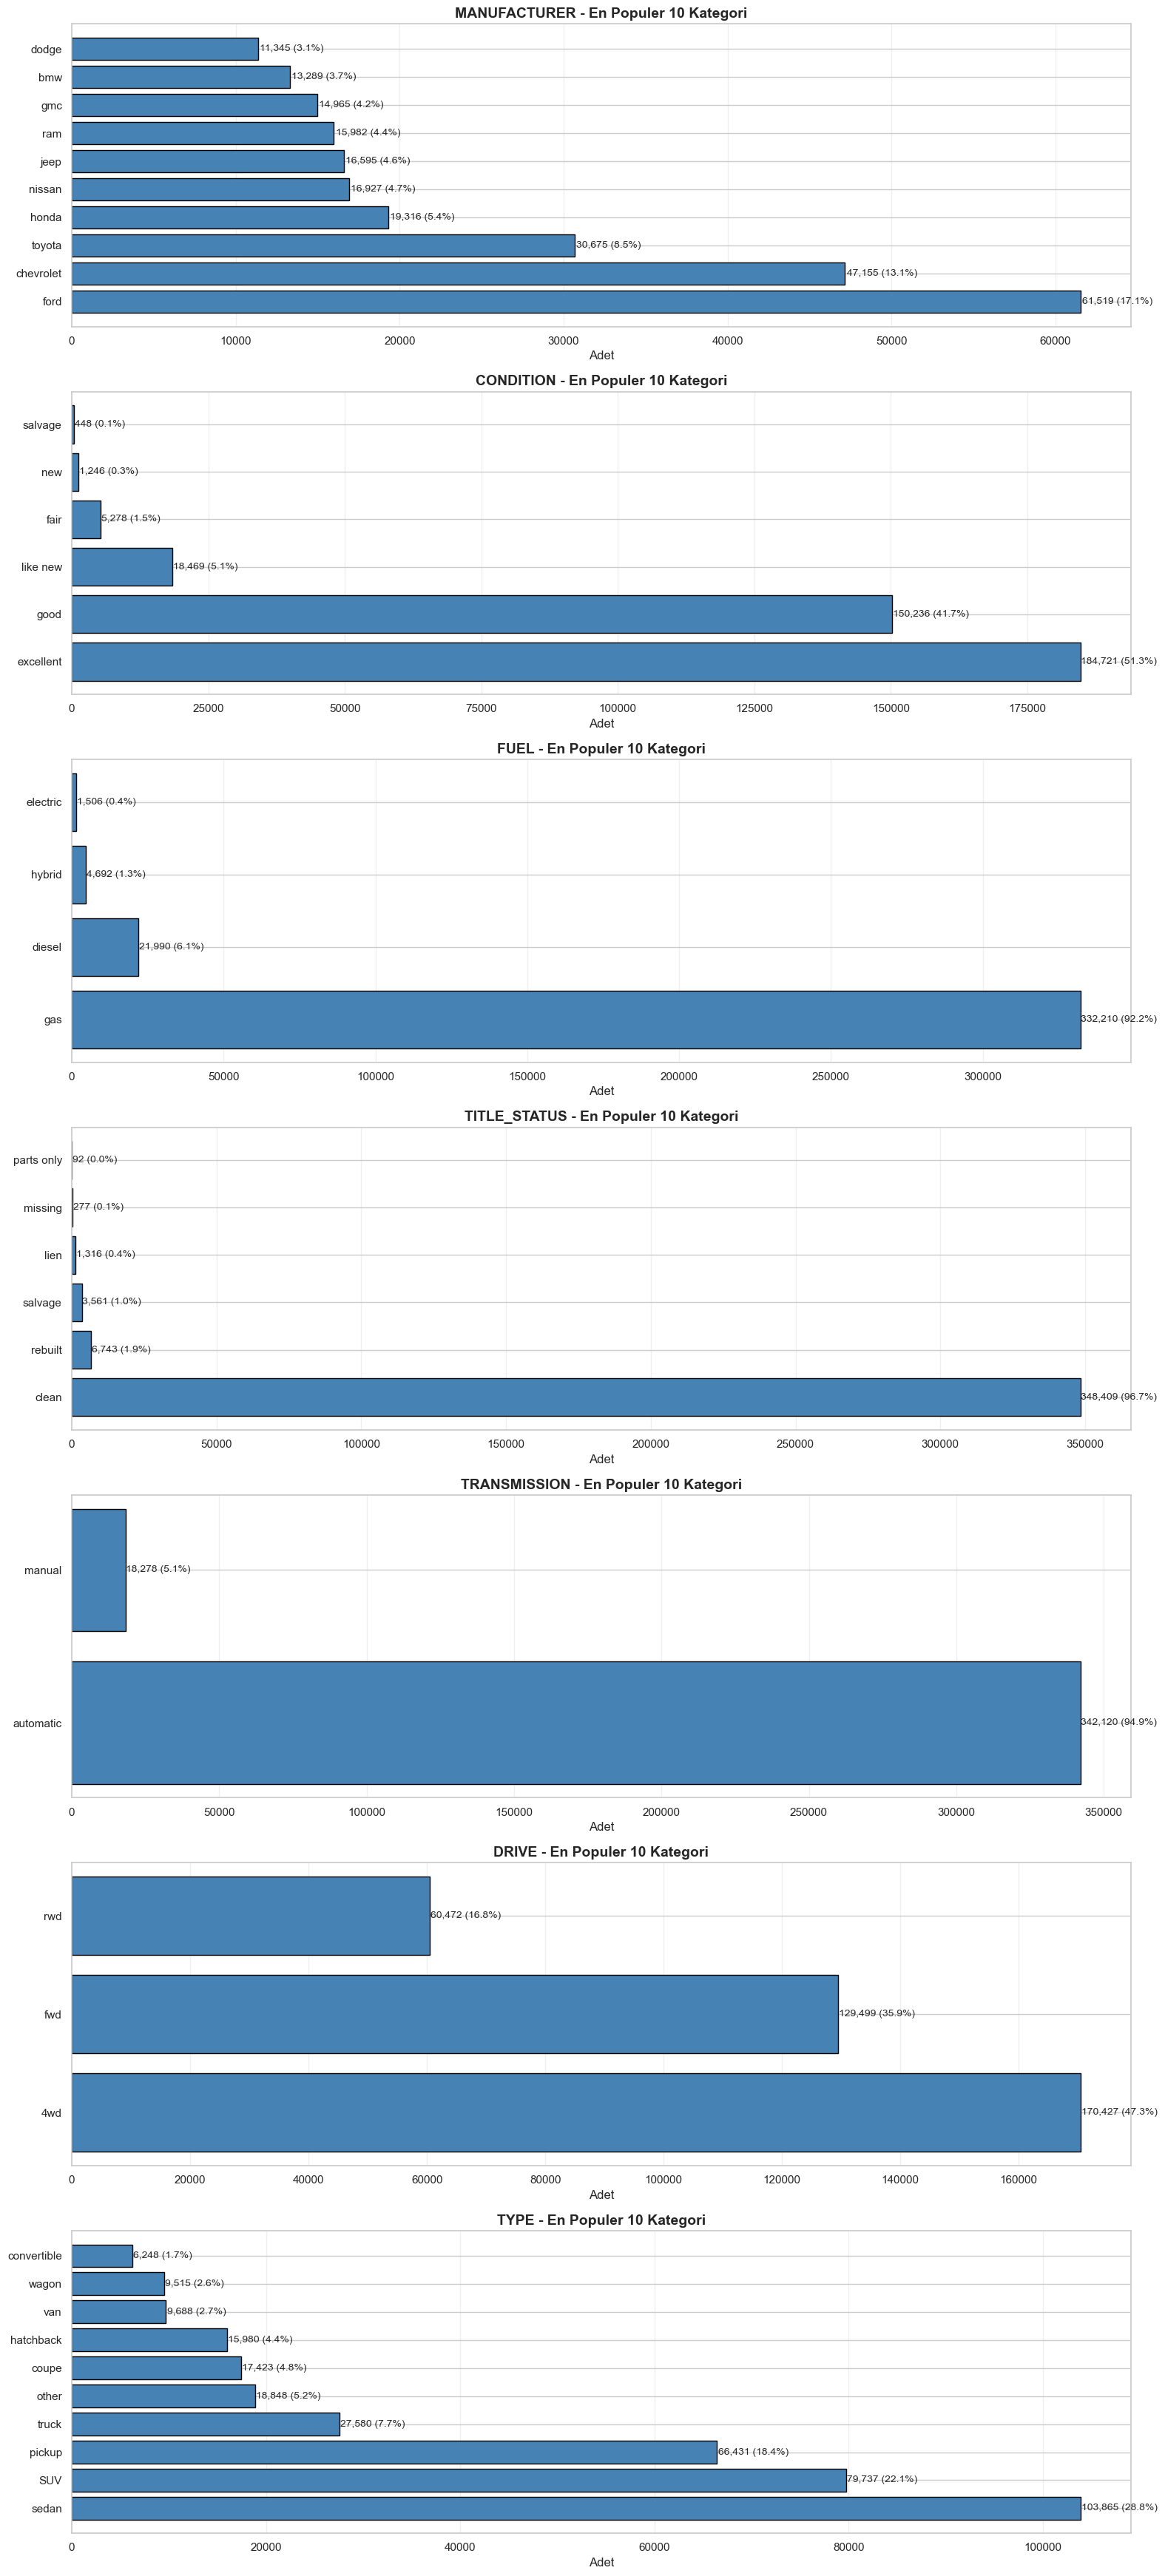


DETAYLI KATEGORI DAGILIMI

MANUFACTURER:
------------------------------------------------------------
  ford                 :  61,519 (17.07%)
  chevrolet            :  47,155 (13.08%)
  toyota               :  30,675 ( 8.51%)
  honda                :  19,316 ( 5.36%)
  nissan               :  16,927 ( 4.70%)
  jeep                 :  16,595 ( 4.60%)
  ram                  :  15,982 ( 4.43%)
  gmc                  :  14,965 ( 4.15%)
  bmw                  :  13,289 ( 3.69%)
  dodge                :  11,345 ( 3.15%)
  ... ve 31 kategori daha

CONDITION:
------------------------------------------------------------
  excellent            : 184,721 (51.25%)
  good                 : 150,236 (41.69%)
  like new             :  18,469 ( 5.12%)
  fair                 :   5,278 ( 1.46%)
  new                  :   1,246 ( 0.35%)
  salvage              :     448 ( 0.12%)

FUEL:
------------------------------------------------------------
  gas                  : 332,210 (92.18%)
  diesel        

In [48]:
print("="*80)
print("KATEGORIK DEGISKENLER GENEL BAKIS")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nToplam kategorik degisken: {len(categorical_cols)}")
print(f"Degiskenler: {categorical_cols}")

summary_data = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    total_count = df[col].count()
    null_count = df[col].isnull().sum()
    top_category = df[col].value_counts().index[0] if len(df[col].value_counts()) > 0 else 'N/A'
    top_count = df[col].value_counts().values[0] if len(df[col].value_counts()) > 0 else 0
    top_percent = (top_count / len(df)) * 100 if len(df) > 0 else 0
    
    summary_data.append({
        'Degisken': col,
        'Unique': unique_count,
        'Total': total_count,
        'Null': null_count,
        'En Populer': top_category,
        'En Populer Adet': top_count,
        'En Populer %': f"{top_percent:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print(summary_df.to_string(index=False))
print("="*80)

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 5*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    top_10 = df[col].value_counts().head(10)
    
    axes[idx].barh(range(len(top_10)), top_10.values, color='steelblue', edgecolor='black')
    axes[idx].set_yticks(range(len(top_10)))
    axes[idx].set_yticklabels(top_10.index)
    axes[idx].set_title(f'{col.upper()} - En Populer 10 Kategori', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Adet', fontsize=12)
    axes[idx].grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top_10.values):
        axes[idx].text(v + 100, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DETAYLI KATEGORI DAGILIMI")
print("="*80)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 60)
    value_counts = df[col].value_counts().head(10)
    for category, count in value_counts.items():
        percent = (count / len(df)) * 100
        print(f"  {category:20} : {count:7,} ({percent:5.2f}%)")
    if df[col].nunique() > 10:
        print(f"  ... ve {df[col].nunique() - 10} kategori daha")
print("="*80)

In [49]:
#Yukarıdaki tabloyu incelediğim zaman gözüme ilk çarpan condition kısmındaki excellent araba oranının fazlalığı oldu.
#Bu sebeple aşşağıda km condition grafiği çizerek incelemek isityorum. 

CONDITION vs ODOMETER ANALİZİ
df_eda null kontrolü: 0


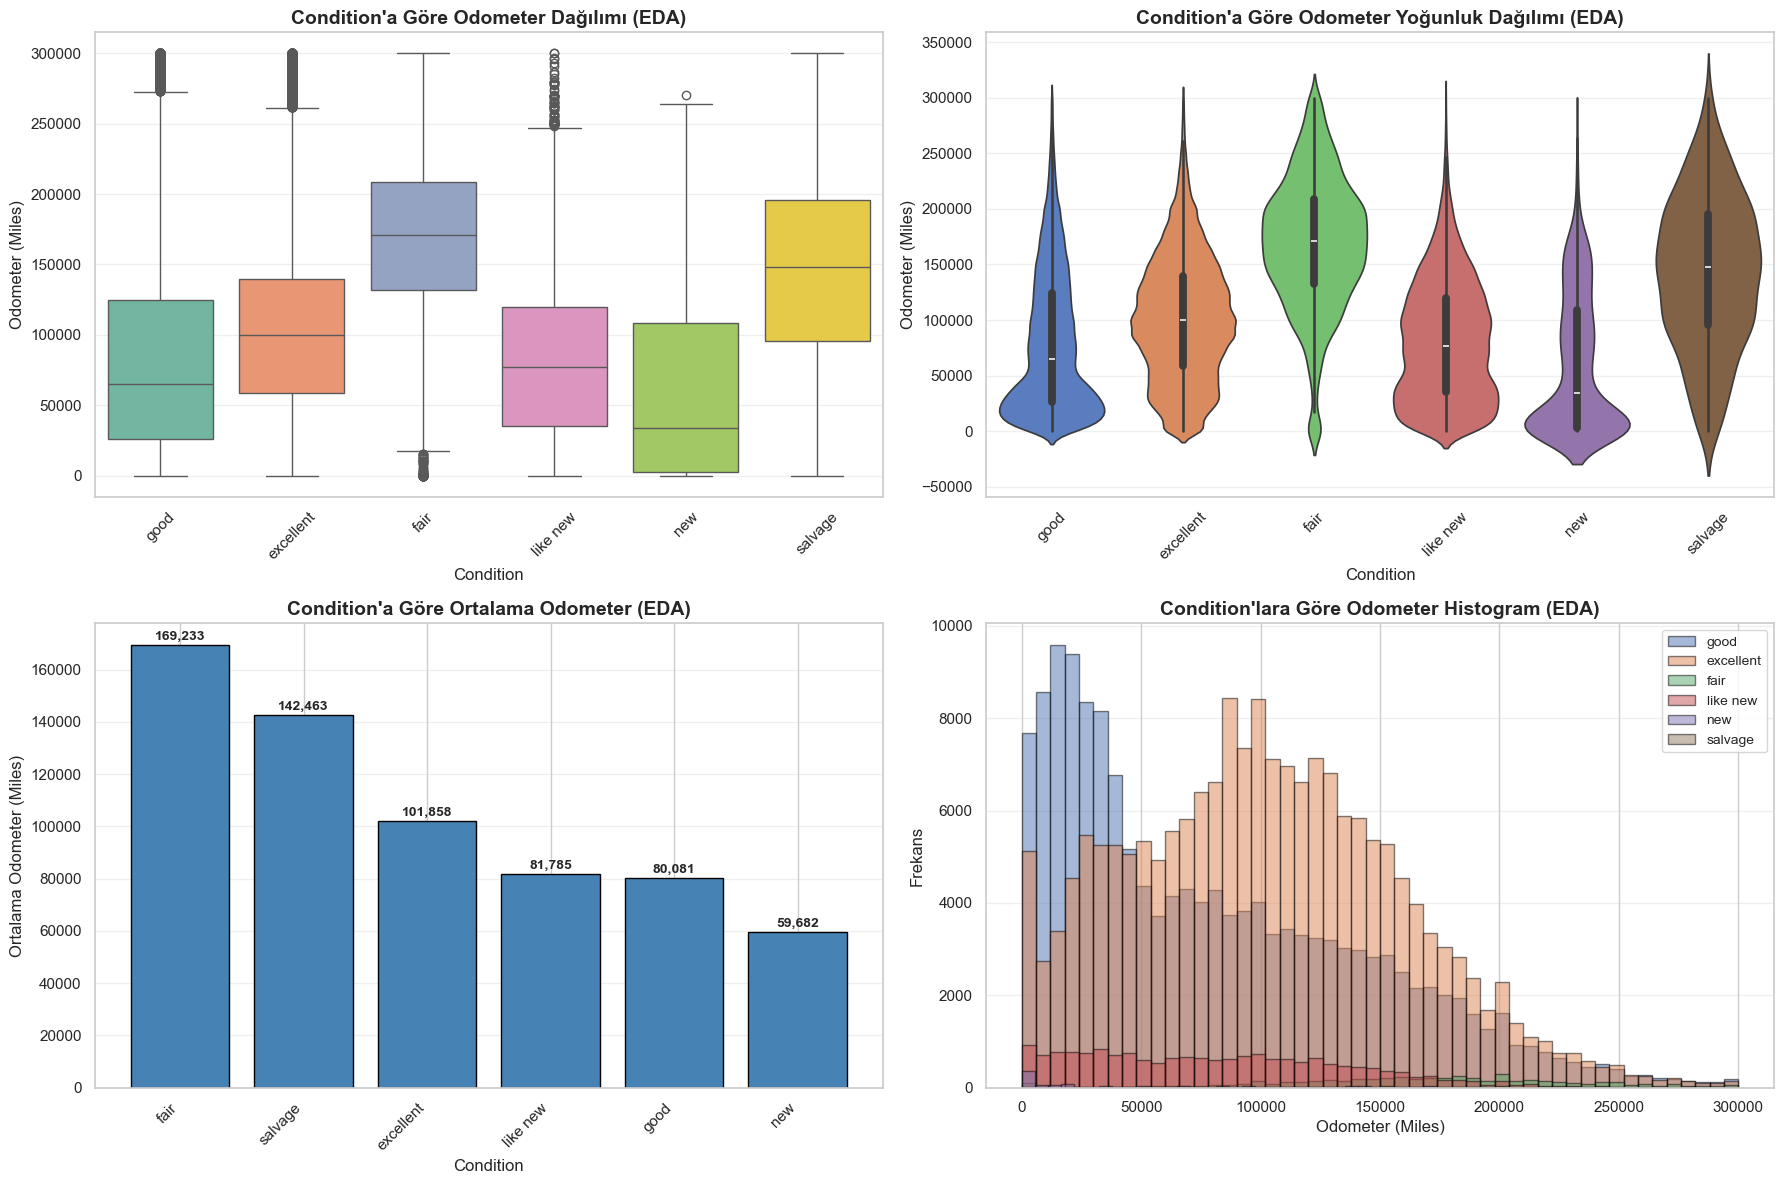


CONDITION vs ODOMETER İSTATİSTİKLERİ (EDA - Null doldurulmuş)
            count       mean     median       std   min        max
condition                                                         
fair         5278 169233.004 170863.500 59890.748 0.000 300000.000
salvage       448 142462.730 148000.000 67989.275 0.000 300000.000
excellent  184721 101858.202  99866.000 56761.753 0.000 300000.000
like new    18469  81785.414  77000.000 54920.177 0.000 300000.000
good       150236  80081.332  64722.500 63963.120 0.000 300000.000
new          1246  59682.278  33865.000 61922.020 0.000 270807.000

CONDITION BAZINDA DETAYLI ANALİZ (EDA)

FAIR:
  Araba sayısı: 5,278
  Ortalama mil: 169,233
  Median mil: 170,864
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 59,891

SALVAGE:
  Araba sayısı: 448
  Ortalama mil: 142,463
  Median mil: 148,000
  En düşük: 0
  En yüksek: 300,000
  Standart sapma: 67,989

EXCELLENT:
  Araba sayısı: 184,721
  Ortalama mil: 101,858
  Median mil: 99,866
  En düşü

In [50]:
print("="*80)
print("CONDITION vs ODOMETER ANALİZİ")
print("="*80)

# ============================================================================
# GEÇİCİ KOPYA OLUŞTUR (Sadece bu grafik için)
# ============================================================================
df_eda = df.copy()

# Odometer null'larını doldur
df_eda['odometer'] = df_eda.groupby(['manufacturer', 'type', 'year'])['odometer'].transform(
    lambda x: x.fillna(x.median()) if x.notna().any() else x
)

# Kalan null'ları (eğer varsa) genel median ile doldur
if df_eda['odometer'].isnull().sum() > 0:
    overall_median = df_eda['odometer'].median()
    df_eda['odometer'].fillna(overall_median, inplace=True)

print(f"df_eda null kontrolü: {df_eda['odometer'].isnull().sum()}")  # 0 olmalı
print("="*80)

# ============================================================================
# GRAFİKLERİ ÇİZ (df_eda kullan)
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Boxplot
sns.boxplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Condition\'a Göre Odometer Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Violin Plot
sns.violinplot(data=df_eda, x='condition', y='odometer', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Condition\'a Göre Odometer Yoğunluk Dağılımı (EDA)', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Bar Chart (Ortalama)
condition_avg = df_eda.groupby('condition')['odometer'].mean().sort_values(ascending=False)
axes[1, 0].bar(range(len(condition_avg)), condition_avg.values, color='steelblue', edgecolor='black')
axes[1, 0].set_xticks(range(len(condition_avg)))
axes[1, 0].set_xticklabels(condition_avg.index, rotation=45, ha='right')
axes[1, 0].set_title('Condition\'a Göre Ortalama Odometer (EDA)', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Condition', fontsize=12)
axes[1, 0].set_ylabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(condition_avg.values):
    axes[1, 0].text(i, v + 2000, f'{v:,.0f}', ha='center', fontsize=10, weight='bold')

# 4. Histogram (Overlapping)
for condition in df_eda['condition'].unique():
    subset = df_eda[df_eda['condition'] == condition]['odometer']
    axes[1, 1].hist(subset, bins=50, alpha=0.5, label=condition, edgecolor='black')

axes[1, 1].set_title('Condition\'lara Göre Odometer Histogram (EDA)', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Odometer (Miles)', fontsize=12)
axes[1, 1].set_ylabel('Frekans', fontsize=12)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER (df_eda kullan)
# ============================================================================
print("\n" + "="*80)
print("CONDITION vs ODOMETER İSTATİSTİKLERİ (EDA - Null doldurulmuş)")
print("="*80)

condition_stats = df_eda.groupby('condition')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
condition_stats = condition_stats.sort_values('mean', ascending=False)
print(condition_stats)
print("="*80)

# Detaylı Analiz
print("\n" + "="*80)
print("CONDITION BAZINDA DETAYLI ANALİZ (EDA)")
print("="*80)

for condition in condition_stats.index:
    data = df_eda[df_eda['condition'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GEÇİCİ VERİYİ SİL
# ============================================================================
del df_eda
print("\nGrafik ve istatistikler tamamlandı, geçici veri silindi")
print("="*80)

CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...

1) Condition düzeltiliyor (odometer + condition kombinasyonu)...

2) Değişim analizi yapılıyor...
   Toplam 244,061 satırda condition değişti (67.72%)

ÖNCESİ vs SONRASI KARŞILAŞTIRMA

ORİJİNAL CONDITION DAĞILIMI:
condition_original
excellent    184721
fair           5278
good         150236
like new      18469
new            1246
salvage         448
Name: count, dtype: int64

Toplam: 360,398

DÜZELTİLMİŞ CONDITION DAĞILIMI:
condition_corrected
excellent    145516
fair          48170
good         106687
like new      50881
new            8696
salvage         448
Name: count, dtype: int64

Toplam: 360,398

DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ
                      count       mean     median       std        min  \
condition_corrected                                                      
new                    8696   3134.142   1461.000  3413.106      0.000   
like new              50881  24229.580  25000.000 15132.113      0.000   
exc

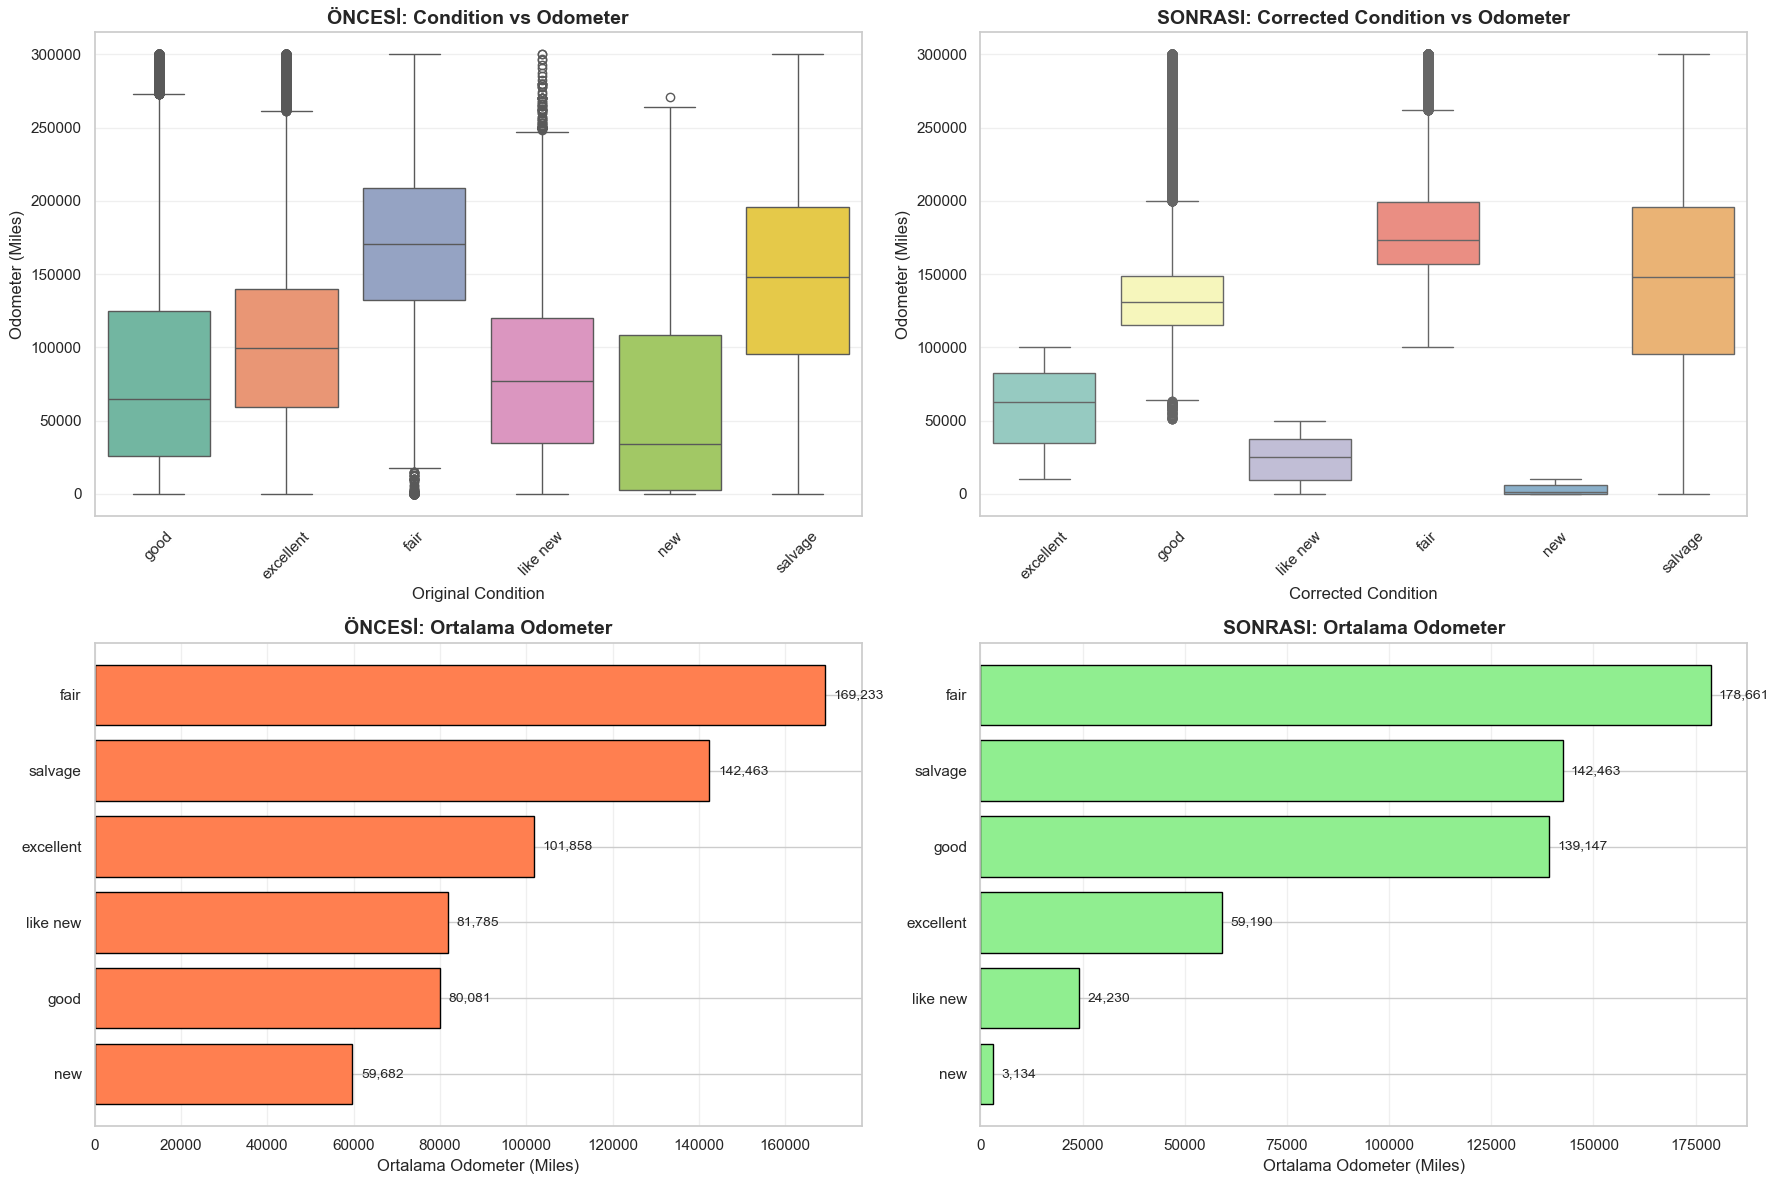


DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)
condition_corrected  excellent   fair    good  like new   new  salvage     All
condition_original                                                            
excellent                54480  36497   54903     31984  6857        0  184721
fair                        71   4623     477       107     0        0    5278
good                     85459      0   51307     13470     0        0  150236
like new                  5272   6715       0      5061  1421        0   18469
new                        234    335       0       259   418        0    1246
salvage                      0      0       0         0     0      448     448
All                     145516  48170  106687     50881  8696      448  360398

CONDITION DÜZELTME TAMAMLANDI!
Yeni sütun: 'condition_corrected'
Orijinal sütun korundu: 'condition_original'
Toplam değişim: 244,061 satır (67.72%)


In [51]:
#2.26 BURADAN DEVAM EDECEĞİZ CONDİTİON KOLONU KULLANICININ YORUMUNA KALDIĞI İÇİN GÜVENİLİR DEĞİL BU SEBEPLE
#     Condition kolonunu odometer kolonu ile gruplayıp tekrradan oluşturacağız


# ============================================================================
# STRATEJİ 1: CONDITION DÜZELTME (MİL BAZLI YENİDEN KATEGORİZASYON)
# ============================================================================

print("="*80)
print("CONDITION DÜZELTME İŞLEMİ BAŞLIYOR...")
print("="*80)

# Orijinal condition'ı yedekle
df['condition_original'] = df['condition'].copy()

# Yeni condition_corrected sütunu oluştur
def correct_condition(row):
    """
    Odometer ve mevcut condition'a göre mantıklı condition ata
    """
    odometer = row['odometer']
    current_condition = row['condition']
    
    # SALVAGE her zaman salvage kalır (hasarlı araç)
    if current_condition == 'salvage':
        return 'salvage'
    
    # MİL BAZLI KATEGORİZASYON
    if odometer <= 10000:
        # 0-10k mil: Gerçekten yeni veya çok az kullanılmış
        if current_condition in ['new', 'like new', 'excellent']:
            return 'new'
        else:
            return 'like new'
    
    elif odometer <= 50000:
        # 10-50k mil: Yeni sayılır
        if current_condition in ['new', 'like new', 'excellent']:
            return 'like new'
        else:
            return 'excellent'
    
    elif odometer <= 100000:
        # 50-100k mil: İyi durumda
        if current_condition in ['new', 'like new', 'excellent', 'good']:
            return 'excellent'
        else:
            return 'good'
    
    elif odometer <= 150000:
        # 100-150k mil: Orta yaşlı
        if current_condition in ['excellent', 'good']:
            return 'good'
        else:
            return 'fair'
    
    else:
        # 150k+ mil: Yaşlı araç
        if current_condition == 'fair':
            return 'fair'
        elif current_condition == 'good':
            return 'good'
        else:
            return 'fair'

# Fonksiyonu uygula
print("\n1) Condition düzeltiliyor (odometer + condition kombinasyonu)...")
df['condition_corrected'] = df.apply(correct_condition, axis=1)

# Değişim analizi
print("\n2) Değişim analizi yapılıyor...")
changes = (df['condition_original'] != df['condition_corrected']).sum()
print(f"   Toplam {changes:,} satırda condition değişti ({changes/len(df)*100:.2f}%)")

# ============================================================================
# KARŞILAŞTIRMA ANALİZİ
# ============================================================================

print("\n" + "="*80)
print("ÖNCESİ vs SONRASI KARŞILAŞTIRMA")
print("="*80)

print("\nORİJİNAL CONDITION DAĞILIMI:")
print(df['condition_original'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

print("\nDÜZELTİLMİŞ CONDITION DAĞILIMI:")
print(df['condition_corrected'].value_counts().sort_index())
print(f"\nToplam: {len(df):,}")

# ============================================================================
# İSTATİSTİKSEL KARŞILAŞTIRMA
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION vs ODOMETER İSTATİSTİKLERİ")
print("="*80)
corrected_stats = df.groupby('condition_corrected')['odometer'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
corrected_stats = corrected_stats.sort_values('mean')
print(corrected_stats)

# ============================================================================
# DETAYLI ANALİZ
# ============================================================================

print("\n" + "="*80)
print("DÜZELTİLMİŞ CONDITION BAZINDA DETAYLI ANALİZ")
print("="*80)
for condition in corrected_stats.index:
    data = df[df['condition_corrected'] == condition]['odometer']
    print(f"\n{condition.upper()}:")
    print(f"  Araba sayısı: {len(data):,}")
    print(f"  Ortalama mil: {data.mean():,.0f}")
    print(f"  Median mil: {data.median():,.0f}")
    print(f"  En düşük: {data.min():,.0f}")
    print(f"  En yüksek: {data.max():,.0f}")
    print(f"  Standart sapma: {data.std():,.0f}")

# ============================================================================
# GÖRSELLEŞTİRME
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1) ÖNCESI: Boxplot
sns.boxplot(data=df, x='condition_original', y='odometer', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('ÖNCESİ: Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Original Condition', fontsize=12)
axes[0, 0].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2) SONRASI: Boxplot
sns.boxplot(data=df, x='condition_corrected', y='odometer', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('SONRASI: Corrected Condition vs Odometer', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Corrected Condition', fontsize=12)
axes[0, 1].set_ylabel('Odometer (Miles)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3) ÖNCESI: Bar Chart (ortalama)
original_avg = df.groupby('condition_original')['odometer'].mean().sort_values()
axes[1, 0].barh(range(len(original_avg)), original_avg.values, color='coral', edgecolor='black')
axes[1, 0].set_yticks(range(len(original_avg)))
axes[1, 0].set_yticklabels(original_avg.index)
axes[1, 0].set_title('ÖNCESİ: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(original_avg.values):
    axes[1, 0].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

# 4) SONRASI: Bar Chart (ortalama)
corrected_avg = df.groupby('condition_corrected')['odometer'].mean().sort_values()
axes[1, 1].barh(range(len(corrected_avg)), corrected_avg.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_yticks(range(len(corrected_avg)))
axes[1, 1].set_yticklabels(corrected_avg.index)
axes[1, 1].set_title('SONRASI: Ortalama Odometer', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Ortalama Odometer (Miles)', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(corrected_avg.values):
    axes[1, 1].text(v + 2000, i, f'{v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# DEĞİŞİM MATRİSİ (Hangi condition'lar nasıl değişti?)
# ============================================================================

print("\n" + "="*80)
print("DEĞİŞİM MATRİSİ (ORİJİNAL → DÜZELTİLMİŞ)")
print("="*80)
change_matrix = pd.crosstab(df['condition_original'], df['condition_corrected'], margins=True)
print(change_matrix)

print("\n" + "="*80)
print("CONDITION DÜZELTME TAMAMLANDI!")
print("="*80)
print(f"Yeni sütun: 'condition_corrected'")
print(f"Orijinal sütun korundu: 'condition_original'")
print(f"Toplam değişim: {changes:,} satır ({changes/len(df)*100:.2f}%)")

In [52]:
df['condition'] = df['condition_corrected']
df.drop(columns=['condition_original', 'condition_corrected'], inplace=True)

In [53]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
27,33590,2014.000,gmc,excellent,8,gas,57923.000,clean,automatic,4wd,pickup
28,22590,2010.000,chevrolet,excellent,8,gas,71229.000,clean,automatic,4wd,pickup
29,39590,2020.000,chevrolet,excellent,8,gas,19160.000,clean,automatic,4wd,pickup
30,30990,2017.000,toyota,excellent,8,gas,41124.000,clean,automatic,4wd,pickup
31,15000,2013.000,ford,good,6,gas,128000.000,clean,automatic,rwd,truck


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360398 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         360398 non-null  int64  
 1   year          360398 non-null  float64
 2   manufacturer  360398 non-null  object 
 3   condition     360398 non-null  object 
 4   cylinders     360398 non-null  int64  
 5   fuel          360398 non-null  object 
 6   odometer      360398 non-null  float64
 7   title_status  360398 non-null  object 
 8   transmission  360398 non-null  object 
 9   drive         360398 non-null  object 
 10  type          360398 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 41.1+ MB


In [55]:
#2.27 Condition düzeltildi kategorik değişkenlerin frekansları incelendi.
#     Şimdi sırada kategorik değişkenlerdeki outlier değerleri incelemede

KORELASYON MATRİSİ ANALİZİ

Korelasyon Matrisi:
           price  cylinders  odometer   year
price      1.000      0.324    -0.542  0.548
cylinders  0.324      1.000     0.068 -0.098
odometer  -0.542      0.068     1.000 -0.590
year       0.548     -0.098    -0.590  1.000


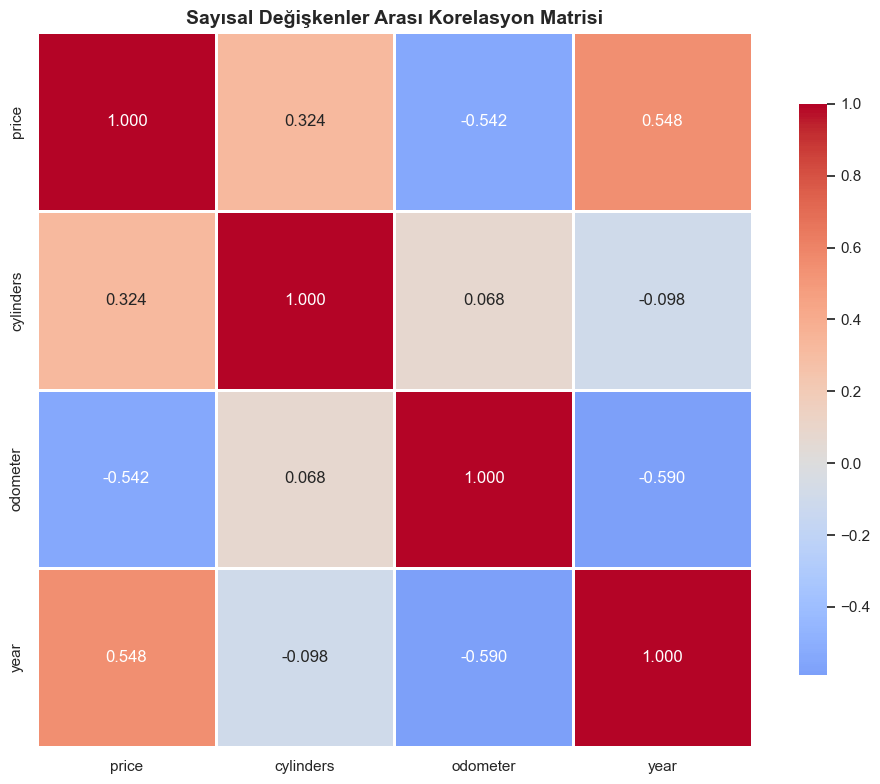


Price ile Korelasyonlar (Yüksekten Düşüğe):
   year                :  0.548
   cylinders           :  0.324
   odometer            : -0.542


In [56]:
#2.28 Sayısal değişkenler arasındaki korelasyonları analiz ediyoruz. Korelasyon matrisi ve heatmap ile
#     değişkenler arası ilişkileri görselleştiriyoruz.

# Sayısal kolonları seç
numeric_cols_for_corr = ['price', 'cylinders', 'odometer', 'year']
numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col in df.columns]

# Korelasyon matrisi hesapla
correlation_matrix = df[numeric_cols_for_corr].corr()

print("="*80)
print("KORELASYON MATRİSİ ANALİZİ")
print("="*80)
print("\nKorelasyon Matrisi:")
print(correlation_matrix.round(3))

# Heatmap görselleştirmesi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Price ile en yüksek korelasyonlu değişkenler
if 'price' in correlation_matrix.columns:
    price_corr = correlation_matrix['price'].drop('price').sort_values(ascending=False)
    print("\nPrice ile Korelasyonlar (Yüksekten Düşüğe):")
    for col, corr_val in price_corr.items():
        print(f"   {col:20}: {corr_val:6.3f}")
print("="*80)


MUTUAL INFORMATION (MI) ANALİZİ

Mutual Information Skorları (Yüksekten Düşüğe):
             Feature  MI_Score
            odometer     2.592
                year     0.631
manufacturer_encoded     0.393
   condition_encoded     0.339
        type_encoded     0.308
           cylinders     0.164
       drive_encoded     0.150
        fuel_encoded     0.084
title_status_encoded     0.028
transmission_encoded     0.023


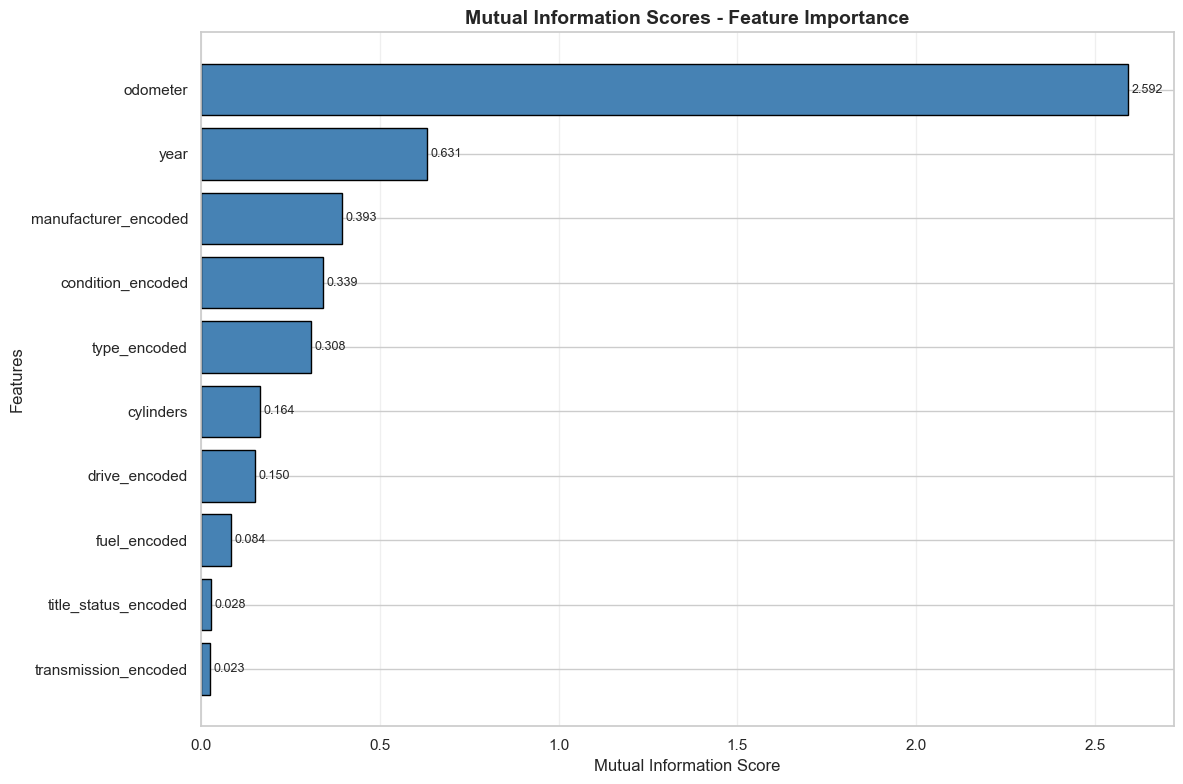


EN ÖNEMLİ 5 ÖZELLİK (MI'ye göre):
2. odometer                 : 2.5920
3. year                     : 0.6310
4. manufacturer_encoded     : 0.3930
5. condition_encoded        : 0.3393
9. type_encoded             : 0.3078


In [57]:
#2.29 Mutual Information (MI) analizi ile özellik-hedef ilişkilerini ölçüyoruz. MI, hem sayısal hem
#     kategorik değişkenler için çalışır ve doğrusal olmayan ilişkileri de yakalayabilir.

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

print("="*80)
print("MUTUAL INFORMATION (MI) ANALİZİ")
print("="*80)

# Sayısal değişkenler için MI
numeric_cols_mi = ['cylinders', 'odometer', 'year']
numeric_cols_mi = [col for col in numeric_cols_mi if col in df.columns]

# Kategorik değişkenleri encode et (MI için)
categorical_cols_mi = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'title_status']
categorical_cols_mi = [col for col in categorical_cols_mi if col in df.columns]

# Kategorik değişkenleri encode et
df_mi = df.copy()
le_dict = {}
for col in categorical_cols_mi:
    le = LabelEncoder()
    df_mi[col + '_encoded'] = le.fit_transform(df_mi[col].astype(str))
    le_dict[col] = le

# Tüm feature'ları birleştir
all_features_mi = numeric_cols_mi + [col + '_encoded' for col in categorical_cols_mi]
X_mi = df_mi[all_features_mi].fillna(0)
y_mi = df_mi['price']

# MI hesapla
mi_scores = mutual_info_regression(X_mi, y_mi, random_state=42)

# Sonuçları DataFrame'e çevir
mi_results = pd.DataFrame({
    'Feature': all_features_mi,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nMutual Information Skorları (Yüksekten Düşüğe):")
print(mi_results.to_string(index=False))

# Görselleştirme
plt.figure(figsize=(12, 8))
mi_results_sorted = mi_results.sort_values('MI_Score', ascending=True)
plt.barh(range(len(mi_results_sorted)), mi_results_sorted['MI_Score'].values, color='steelblue', edgecolor='black')
plt.yticks(range(len(mi_results_sorted)), mi_results_sorted['Feature'].values)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Mutual Information Scores - Feature Importance', fontsize=14, weight='bold')
plt.grid(axis='x', alpha=0.3)

# Değerleri bar'ların üzerine yaz
for i, v in enumerate(mi_results_sorted['MI_Score'].values):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("EN ÖNEMLİ 5 ÖZELLİK (MI'ye göre):")
print("="*80)
for idx, row in mi_results.head(5).iterrows():
    print(f"{idx+1}. {row['Feature']:25}: {row['MI_Score']:.4f}")
print("="*80)


PAIRPLOT GÖRSELLEŞTİRMESİ

Örneklem boyutu: 5,000 (Toplam: 360,398)
Analiz edilen değişkenler: ['price', 'cylinders', 'odometer', 'year']


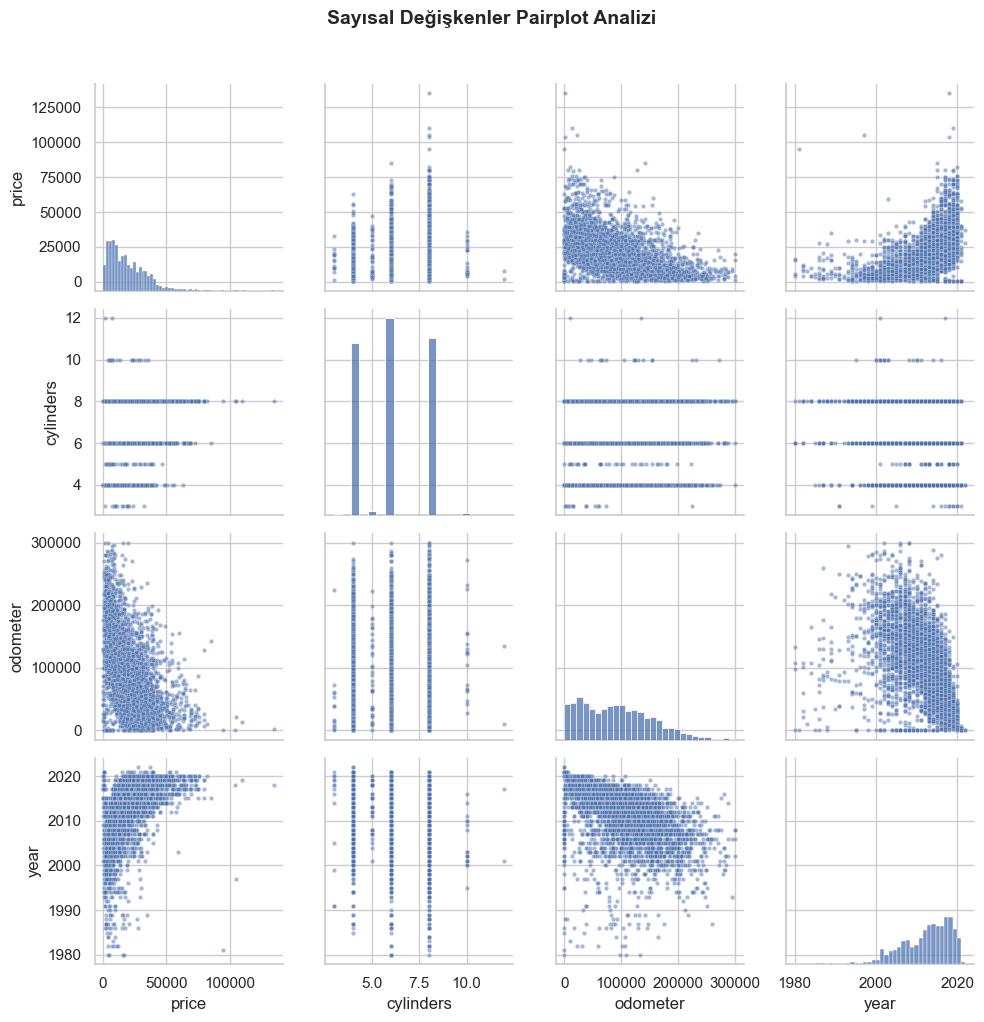


PAIRPLOT ANALİZİ TAMAMLANDI!


In [58]:
#2.30 Pairplot ile tüm sayısal değişkenlerin çiftli dağılımlarını görselleştiriyoruz. Bu sayede
#     değişkenler arası ilişkileri, kümeleri ve aykırı değerleri daha iyi anlayabiliyoruz.

# Sayısal kolonları seç (price dahil)
numeric_cols_pair = ['price', 'cylinders', 'odometer', 'year']
numeric_cols_pair = [col for col in numeric_cols_pair if col in df.columns]

# Örnekleme yap (pairplot çok büyük veri setlerinde yavaş olabilir)
sample_size = min(5000, len(df))
df_pairplot = df[numeric_cols_pair].sample(n=sample_size, random_state=42)

print("="*80)
print("PAIRPLOT GÖRSELLEŞTİRMESİ")
print("="*80)
print(f"\nÖrneklem boyutu: {sample_size:,} (Toplam: {len(df):,})")
print(f"Analiz edilen değişkenler: {numeric_cols_pair}")

# Pairplot oluştur
pairplot_fig = sns.pairplot(df_pairplot, diag_kind='hist', plot_kws={'alpha': 0.5, 's': 10})
pairplot_fig.fig.suptitle('Sayısal Değişkenler Pairplot Analizi', y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("PAIRPLOT ANALİZİ TAMAMLANDI!")
print("="*80)


KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)
Analiz edilecek degiskenler: ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type']


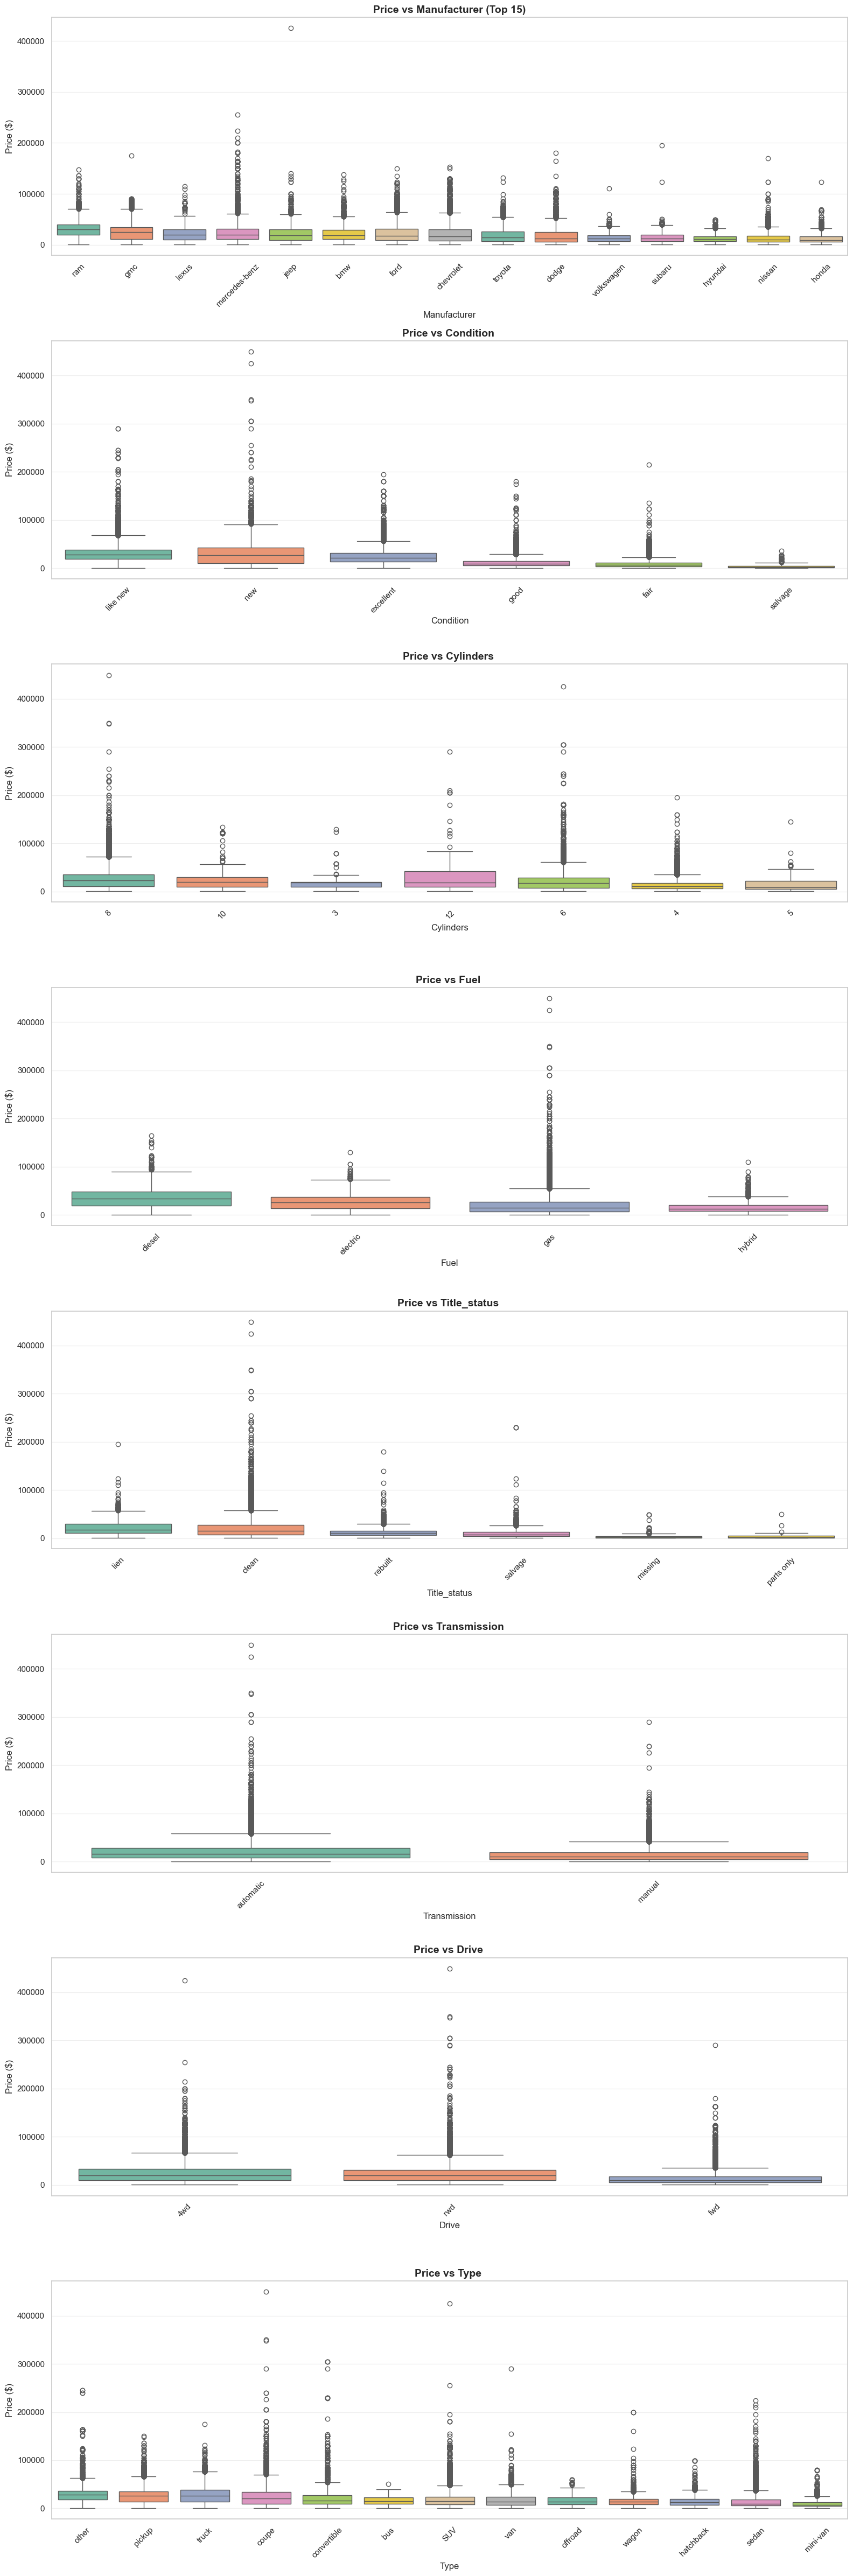


FIYAT ISTATISTIKLERI OZET

MANUFACTURER:
----------------------------------------------------------------------
 1. ferrari              | Med: $119,500 | Avg: $142,362 | n=60
 2. aston-martin         | Med: $ 52,000 | Avg: $ 61,137 | n=21
 3. tesla                | Med: $ 37,990 | Avg: $ 38,721 | n=738
 4. ram                  | Med: $ 29,999 | Avg: $ 30,555 | n=15,982
 5. porsche              | Med: $ 29,972 | Avg: $ 34,132 | n=1,244
 6. jaguar               | Med: $ 28,990 | Avg: $ 27,338 | n=1,849
 7. alfa-romeo           | Med: $ 28,163 | Avg: $ 28,740 | n=365
 8. rover                | Med: $ 26,287 | Avg: $ 29,610 | n=1,921
 9. audi                 | Med: $ 24,990 | Avg: $ 25,456 | n=7,011
10. gmc                  | Med: $ 24,590 | Avg: $ 25,504 | n=14,965

CONDITION:
----------------------------------------------------------------------
 1. like new             | Med: $ 28,300 | Avg: $ 30,246 | n=50,881
 2. new                  | Med: $ 26,500 | Avg: $ 31,102 | n=8,696
 3. exc

In [59]:
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                    'title_status', 'transmission', 'drive', 'type']

categorical_cols = [col for col in categorical_cols if col in df.columns]

print("="*70)
print("KATEGORIK DEGISKENLER vs PRICE (BOXPLOT)")
print("="*70)
print(f"Analiz edilecek degiskenler: {categorical_cols}")

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(16, 6*len(categorical_cols)))

if len(categorical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    
    unique_count = df[col].nunique()
    
    if unique_count > 15:
        top_categories = df[col].value_counts().head(15).index
        df_filtered = df[df[col].isin(top_categories)]
        title_suffix = "(Top 15)"
    else:
        df_filtered = df
        title_suffix = ""
    
    order = df_filtered.groupby(col)['price'].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df_filtered, x=col, y='price', order=order, 
                palette='Set2', ax=axes[idx])
    
    axes[idx].set_title(f'Price vs {col.capitalize()} {title_suffix}', 
                        fontsize=14, weight='bold')
    axes[idx].set_xlabel(col.capitalize(), fontsize=12)
    axes[idx].set_ylabel('Price ($)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FIYAT ISTATISTIKLERI OZET")
print("="*70)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print("-" * 70)
    
    stats = df.groupby(col)['price'].agg(['median', 'mean', 'count']).sort_values('median', ascending=False)
    
    for idx, (category, row) in enumerate(stats.head(10).iterrows(), 1):
        print(f"{idx:2}. {str(category):20} | Med: ${row['median']:7,.0f} | "
              f"Avg: ${row['mean']:7,.0f} | n={int(row['count']):,}")

print("="*70)

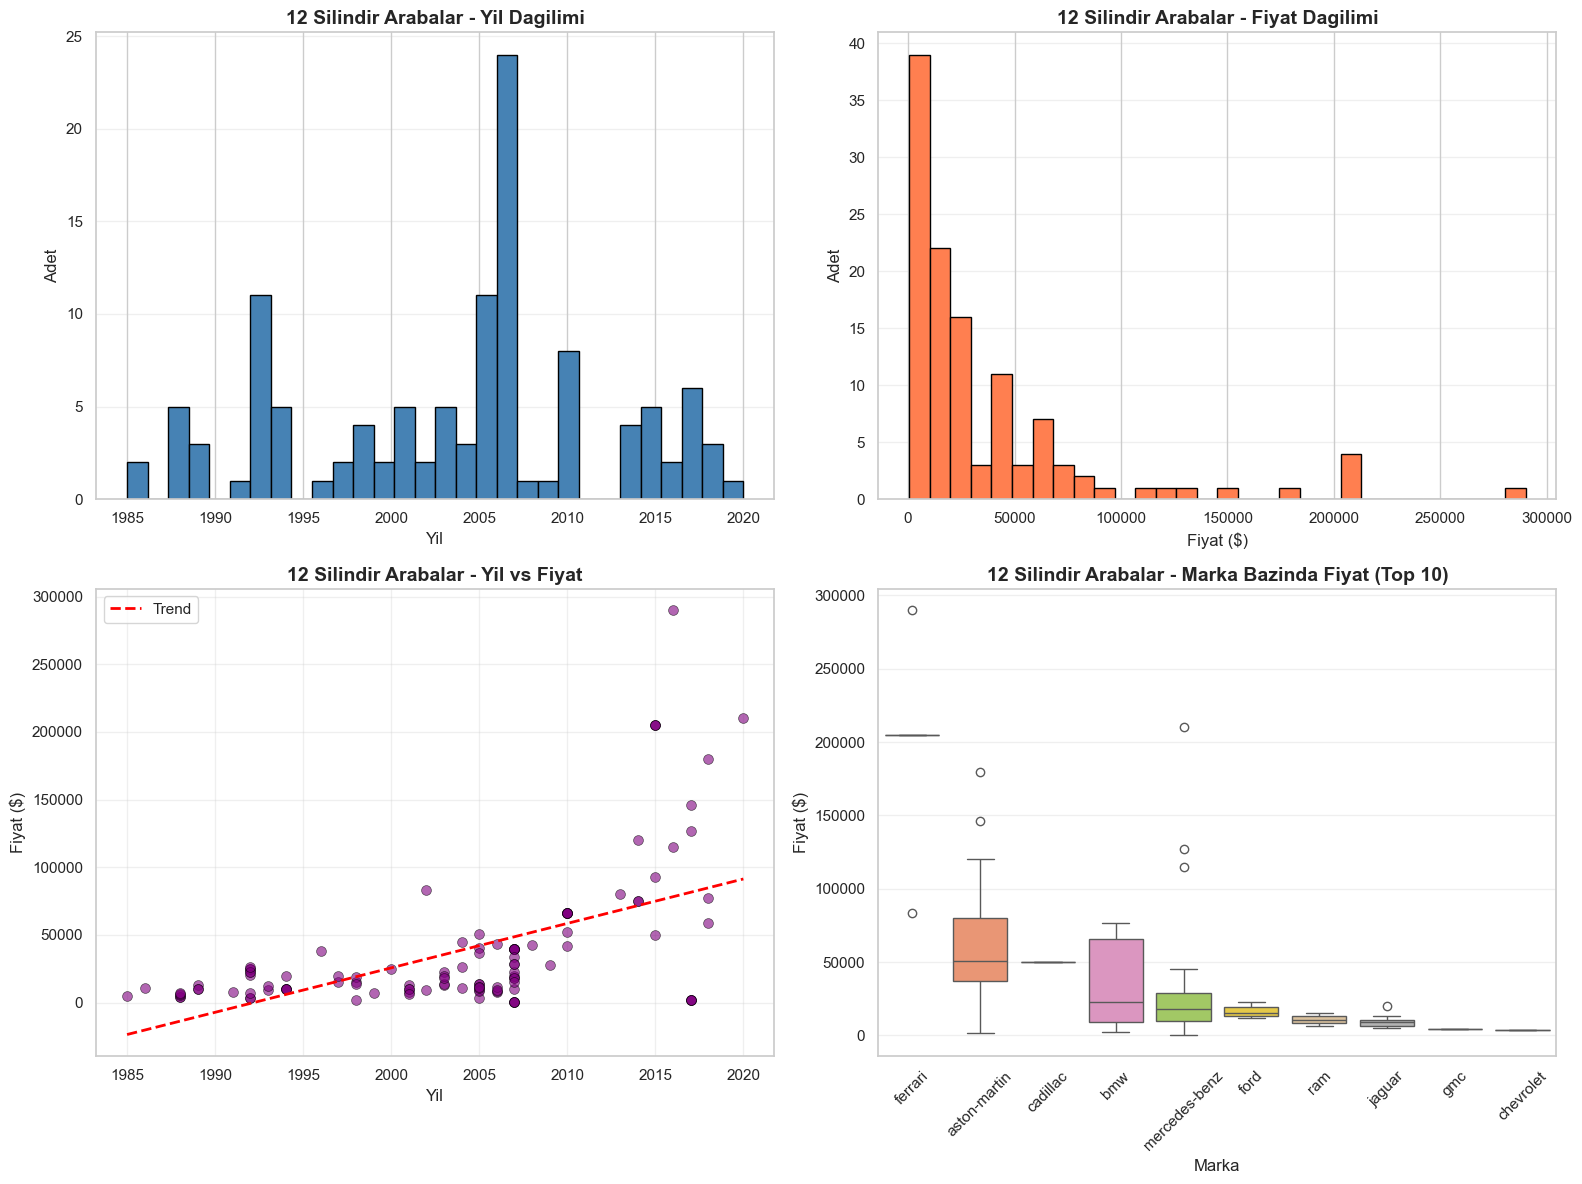

12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER

Toplam araba: 117
Ortalama fiyat: $37,562
Median fiyat: $18,300
Min fiyat: $568
Max fiyat: $289,995

Ortalama yil: 2004
En eski: 1985
En yeni: 2020


In [60]:
# ============================================================================
# 12 SİLİNDİR ARABALAR - GRAFİKLER
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 12 silindir arabaları filtrele
cyl_12 = df[df['cylinders'] == 12]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# 1. YIL DAĞILIMI (Histogram)
# ============================================================================
axes[0, 0].hist(cyl_12['year'], bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('12 Silindir Arabalar - Yil Dagilimi', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Yil', fontsize=12)
axes[0, 0].set_ylabel('Adet', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# ============================================================================
# 2. FİYAT DAĞILIMI (Histogram)
# ============================================================================
axes[0, 1].hist(cyl_12['price'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('12 Silindir Arabalar - Fiyat Dagilimi', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Fiyat ($)', fontsize=12)
axes[0, 1].set_ylabel('Adet', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# ============================================================================
# 3. YIL vs FİYAT (Scatter Plot)
# ============================================================================
axes[1, 0].scatter(cyl_12['year'], cyl_12['price'], alpha=0.6, s=50, 
                   color='purple', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('12 Silindir Arabalar - Yil vs Fiyat', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Yil', fontsize=12)
axes[1, 0].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# Trend line ekle
z = np.polyfit(cyl_12['year'], cyl_12['price'], 1)
p = np.poly1d(z)
axes[1, 0].plot(sorted(cyl_12['year'].unique()), 
                p(sorted(cyl_12['year'].unique())), 
                color='red', linewidth=2, linestyle='--', label='Trend')
axes[1, 0].legend()

# ============================================================================
# 4. MARKA BAZINDA FİYAT (Box Plot)
# ============================================================================
# En fazla 12 silindir araç olan markaları al
top_brands = cyl_12['manufacturer'].value_counts().head(10).index
cyl_12_top = cyl_12[cyl_12['manufacturer'].isin(top_brands)]

order = cyl_12_top.groupby('manufacturer')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=cyl_12_top, x='manufacturer', y='price', order=order, 
            palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('12 Silindir Arabalar - Marka Bazinda Fiyat (Top 10)', 
                     fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Marka', fontsize=12)
axes[1, 1].set_ylabel('Fiyat ($)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# İSTATİSTİKLER
# ============================================================================
print("="*80)
print("12 SİLİNDİR ARABALAR - OZET İSTATİSTİKLER")
print("="*80)
print(f"\nToplam araba: {len(cyl_12):,}")
print(f"Ortalama fiyat: ${cyl_12['price'].mean():,.0f}")
print(f"Median fiyat: ${cyl_12['price'].median():,.0f}")
print(f"Min fiyat: ${cyl_12['price'].min():,.0f}")
print(f"Max fiyat: ${cyl_12['price'].max():,.0f}")
print(f"\nOrtalama yil: {cyl_12['year'].mean():.0f}")
print(f"En eski: {cyl_12['year'].min():.0f}")
print(f"En yeni: {cyl_12['year'].max():.0f}")
print("="*80)

In [61]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
27,33590,2014.000,gmc,excellent,8,gas,57923.000,clean,automatic,4wd,pickup
28,22590,2010.000,chevrolet,excellent,8,gas,71229.000,clean,automatic,4wd,pickup
29,39590,2020.000,chevrolet,excellent,8,gas,19160.000,clean,automatic,4wd,pickup
30,30990,2017.000,toyota,excellent,8,gas,41124.000,clean,automatic,4wd,pickup
31,15000,2013.000,ford,good,6,gas,128000.000,clean,automatic,rwd,truck


FEATURE SELECTION - FILTER YÖNTEMLERİ

--------------------------------------------------------------------------------
ANOVA F-TEST İLE FEATURE SELECTION
--------------------------------------------------------------------------------

En iyi 10 özellik (ANOVA F-test):
             Feature    F_Score
                year 123489.227
            odometer 119760.613
           cylinders  34014.265
        fuel_encoded  22814.678
       drive_encoded   4212.942
title_status_encoded   2359.581
transmission_encoded   1554.204
manufacturer_encoded    827.870
        type_encoded    259.593
   condition_encoded      5.861

--------------------------------------------------------------------------------
MUTUAL INFORMATION İLE FEATURE SELECTION
--------------------------------------------------------------------------------

En iyi 10 özellik (Mutual Information):
             Feature  MI_Score
            odometer     2.379
                year     0.619
manufacturer_encoded     0.382
   condi

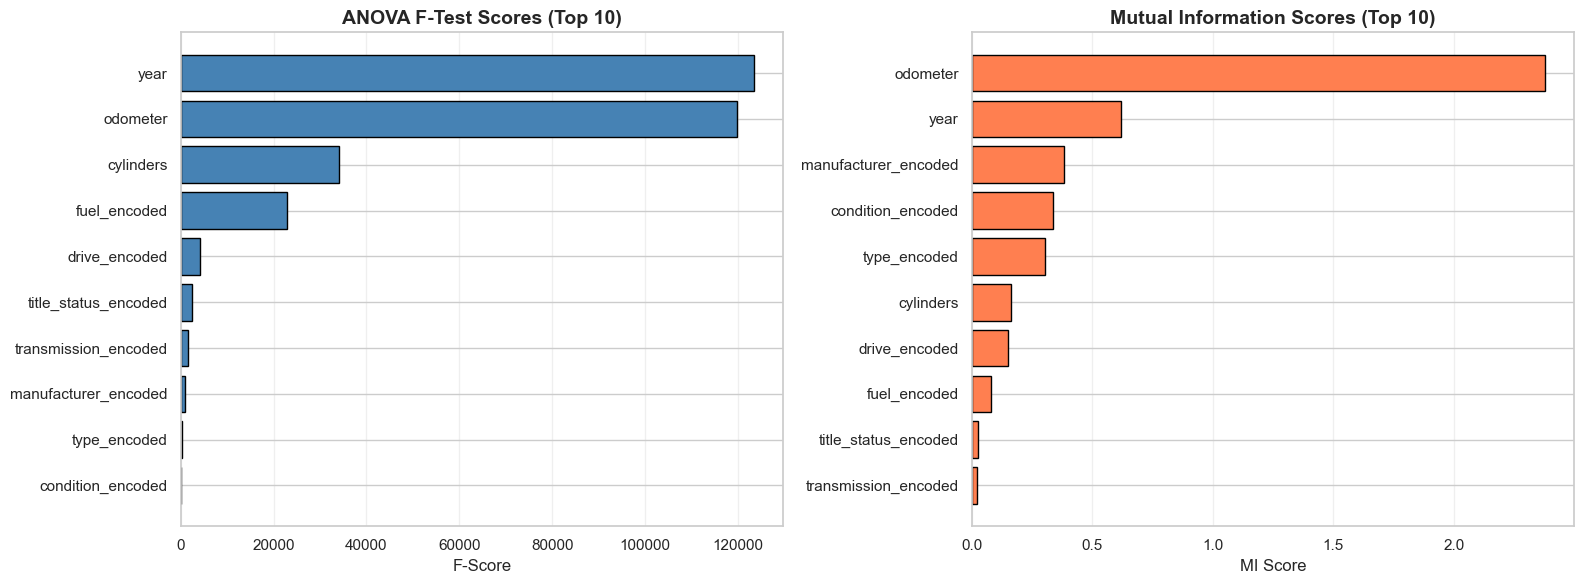


ÖZET
ANOVA ile seçilen özellikler: 10
MI ile seçilen özellikler: 10
Her iki yöntemle de seçilen özellikler: 10

Ortak özellikler: ['condition_encoded', 'odometer', 'year', 'cylinders', 'transmission_encoded', 'type_encoded', 'title_status_encoded', 'drive_encoded', 'fuel_encoded', 'manufacturer_encoded']


In [62]:
#3.4 Feature Selection ile en önemli özellikleri seçiyoruz. Mutual Information ve ANOVA F-test
#     gibi filter yöntemleri kullanarak gereksiz özellikleri filtreliyoruz.

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# X ve y değişkenlerini tanımla (eğer tanımlı değilse)
try:
    # X ve y'nin tanımlı olup olmadığını kontrol et
    _ = X
    _ = y
except NameError:
    # X ve y tanımlı değilse, tanımla
    X = df.drop("price", axis=1)  # Tüm özellikler (price hariç)
    y = df["price"]  # Target değişken

print("="*80)
print("FEATURE SELECTION - FILTER YÖNTEMLERİ")
print("="*80)

# Feature selection için hazırlık
# Kategorik değişkenleri encode et
X_fs = X.copy()
le_fs_dict = {}

for col in X_fs.select_dtypes(include='object').columns:
    le_fs = LabelEncoder()
    X_fs[col + '_encoded'] = le_fs.fit_transform(X_fs[col].astype(str))
    le_fs_dict[col] = le_fs

# Sadece sayısal kolonları al
numeric_cols_fs = X_fs.select_dtypes(exclude='object').columns.tolist()
X_fs_numeric = X_fs[numeric_cols_fs].fillna(0)

# Train/test split (feature selection için)
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_fs_numeric, y, test_size=0.2, random_state=42
)

# 3.4.1) ANOVA F-test ile feature selection
print("\n" + "-"*80)
print("ANOVA F-TEST İLE FEATURE SELECTION")
print("-"*80)

# En iyi k özelliği seç (toplam özellik sayısının yarısı)
k_best = min(10, len(numeric_cols_fs))
selector_anova = SelectKBest(score_func=f_regression, k=k_best)
X_train_anova = selector_anova.fit_transform(X_train_fs, y_train_fs)

# Seçilen özellikler
selected_features_anova = [numeric_cols_fs[i] for i in selector_anova.get_support(indices=True)]
scores_anova = selector_anova.scores_

anova_results = pd.DataFrame({
    'Feature': numeric_cols_fs,
    'F_Score': scores_anova
}).sort_values('F_Score', ascending=False)

print(f"\nEn iyi {k_best} özellik (ANOVA F-test):")
print(anova_results.head(k_best).to_string(index=False))

# 3.4.2) Mutual Information ile feature selection
print("\n" + "-"*80)
print("MUTUAL INFORMATION İLE FEATURE SELECTION")
print("-"*80)

selector_mi = SelectKBest(score_func=mutual_info_regression, k=k_best)
X_train_mi = selector_mi.fit_transform(X_train_fs, y_train_fs)

# Seçilen özellikler
selected_features_mi = [numeric_cols_fs[i] for i in selector_mi.get_support(indices=True)]
scores_mi = selector_mi.scores_

mi_results_fs = pd.DataFrame({
    'Feature': numeric_cols_fs,
    'MI_Score': scores_mi
}).sort_values('MI_Score', ascending=False)

print(f"\nEn iyi {k_best} özellik (Mutual Information):")
print(mi_results_fs.head(k_best).to_string(index=False))

# 3.4.3) Karşılaştırma görselleştirmesi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ANOVA F-scores
anova_top = anova_results.head(10).sort_values('F_Score', ascending=True)
axes[0].barh(range(len(anova_top)), anova_top['F_Score'].values, color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(anova_top)))
axes[0].set_yticklabels(anova_top['Feature'].values)
axes[0].set_xlabel('F-Score', fontsize=12)
axes[0].set_title('ANOVA F-Test Scores (Top 10)', fontsize=14, weight='bold')
axes[0].grid(axis='x', alpha=0.3)

# MI Scores
mi_top = mi_results_fs.head(10).sort_values('MI_Score', ascending=True)
axes[1].barh(range(len(mi_top)), mi_top['MI_Score'].values, color='coral', edgecolor='black')
axes[1].set_yticks(range(len(mi_top)))
axes[1].set_yticklabels(mi_top['Feature'].values)
axes[1].set_xlabel('MI Score', fontsize=12)
axes[1].set_title('Mutual Information Scores (Top 10)', fontsize=14, weight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 3.4.4) Ortak seçilen özellikler
common_features = set(selected_features_anova) & set(selected_features_mi)
print("\n" + "="*80)
print("ÖZET")
print("="*80)
print(f"ANOVA ile seçilen özellikler: {len(selected_features_anova)}")
print(f"MI ile seçilen özellikler: {len(selected_features_mi)}")
print(f"Her iki yöntemle de seçilen özellikler: {len(common_features)}")
if common_features:
    print(f"\nOrtak özellikler: {list(common_features)}")
print("="*80)


# 3-)Feature Engineering - Özellik Mühendisliği
### Amacımız var sütunları kullanarak yeni sütunlar oluşturmak

In [63]:
#3.1 Amacımız var olan sütunları kullanarak yeni sütunlar oluşturmak.
#    Öncelikle year sütununu kullanarak car age ve mil_per_year sütunlarını oluşturuyoruz.

df["car_age"] = (2025 - df["year"]).astype(int)
df["mil_per_year"] = (df["odometer"] / df["car_age"]) 

df.drop(columns=["year"],inplace=True)

In [64]:
#3.2 Oluşturduğumuz car_age kolonundan kategorik bir age kolonu daha oluşturuyoruz.

def categorize_age(age):
    if age <= 2:
        return 'brand_new'
    elif age <= 5:
        return 'new'
    elif age <= 10:
        return 'mid_age'
    elif age <= 15:
        return 'old'
    else:
        return 'very_old'

df['age_category'] = df['car_age'].apply(categorize_age)

In [65]:
#3.3 Silindir sayısını kullanarak tekrardan bir kategorik değişken oluşturuyoruz.

def categorize_engine(cylinders):
    if cylinders <= 4:
        return 'small_engine'
    elif cylinders <= 6:
        return 'medium_engine'
    else:
        return 'large_engine'

df['engine_category'] = df['cylinders'].apply(categorize_engine)

In [66]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,car_age,mil_per_year,age_category,engine_category
27,33590,gmc,excellent,8,gas,57923.000,clean,automatic,4wd,pickup,11,5265.727,old,large_engine
28,22590,chevrolet,excellent,8,gas,71229.000,clean,automatic,4wd,pickup,15,4748.600,old,large_engine
29,39590,chevrolet,excellent,8,gas,19160.000,clean,automatic,4wd,pickup,5,3832.000,new,large_engine
30,30990,toyota,excellent,8,gas,41124.000,clean,automatic,4wd,pickup,8,5140.500,mid_age,large_engine
31,15000,ford,good,6,gas,128000.000,clean,automatic,rwd,truck,12,10666.667,old,medium_engine


In [67]:
numeric_cols=[]
categorical_cols=[]

for col in df.columns:
    if df[col].dtype == object:
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

In [68]:
numeric_cols

['price', 'cylinders', 'odometer', 'car_age', 'mil_per_year']

In [69]:
categorical_cols

['manufacturer',
 'condition',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'age_category',
 'engine_category']

In [70]:
df.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,car_age,mil_per_year,age_category,engine_category
27,33590,gmc,excellent,8,gas,57923.000,clean,automatic,4wd,pickup,11,5265.727,old,large_engine
28,22590,chevrolet,excellent,8,gas,71229.000,clean,automatic,4wd,pickup,15,4748.600,old,large_engine
29,39590,chevrolet,excellent,8,gas,19160.000,clean,automatic,4wd,pickup,5,3832.000,new,large_engine
30,30990,toyota,excellent,8,gas,41124.000,clean,automatic,4wd,pickup,8,5140.500,mid_age,large_engine
31,15000,ford,good,6,gas,128000.000,clean,automatic,rwd,truck,12,10666.667,old,medium_engine


# 4- Train/Test Split - Eğitim ve Test Verisi Bölme

In [71]:
#4.1 Bu aşamada veriyi eğitim ve test olmak üzere ikiye bölüyoruz.
#    ÖNEMLİ: Encoding ve scaling işlemleri bu split'ten SONRA yapılmalı!

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#4.2 price bizim target değişkenimiz olduğu için y'e geri kalan tüm sutunları X'e atadık.
#    Modele X leri vericez bize y yi tahmin edicek.

X = df.drop("price", axis=1)  # Tüm özellikler (price hariç)
y = df["price"]       

In [74]:
# 4.3) Kategorik ve numerik kolonları belirle
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(exclude='object').columns.tolist()

print(f"\n Kolon Tipleri:")
print(f"   Kategorik ({len(categorical_cols)}): {categorical_cols}")
print(f"   Numerik ({len(numeric_cols)}): {numeric_cols}")


 Kolon Tipleri:
   Kategorik (9): ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'age_category', 'engine_category']
   Numerik (4): ['cylinders', 'odometer', 'car_age', 'mil_per_year']


In [75]:
# 4.4) y'yi log-transform et (fiyat tahmini için daha iyi dağılım)
y_log = np.log1p(y)

# 4.5) Train/Test split yap (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log,
    train_size=0.80,
    random_state=42,  # Reproducibility için sabit seed
    shuffle=True      # Karıştır (veri sıralı olabilir)
)

In [76]:

# 4.4) Split sonuçlarını raporla
print(f"\n" + "="*80)
print("BÖLME SONUÇLARI")
print("="*80)
print(f"Train Set:")
print(f"   • X_train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • y_train: {y_train.shape}")
print(f"   • Ortalama fiyat (log): {y_train.mean():.3f}")
print(f"   • Ortalama fiyat ($): ${np.expm1(y_train.mean()):,.0f}")

print(f"\nTest Set:")
print(f"   • X_test: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   • y_test: {y_test.shape}")
print(f"   • Ortalama fiyat (log): {y_test.mean():.3f}")
print(f"   • Ortalama fiyat ($): ${np.expm1(y_test.mean()):,.0f}")

# 4.5) Veri dağılımını kontrol et (train ve test benzer mi?)
print(f"\n" + "="*80)
print("DAĞILIM KONTROLÜ (Train vs Test)")
print("="*80)

# Kategorik değişkenler için dağılım karşılaştırması
for col in ['manufacturer', 'condition', 'fuel']:
    print(f"\n[{col}]:")
    train_dist = X_train[col].value_counts(normalize=True).head(3)
    test_dist = X_test[col].value_counts(normalize=True).head(3)
    
    for category in train_dist.index:
        train_pct = train_dist.get(category, 0) * 100
        test_pct = test_dist.get(category, 0) * 100
        print(f"   {category:20} - Train: {train_pct:5.1f}% | Test: {test_pct:5.1f}%")

print("\n" + "="*80)
print("VERİ BÖLME TAMAMLANDI!")
print("="*80)
print("\nÖNEMLİ: X_train ve X_test henüz ENCODE EDİLMEDİ!")
print("   Kategorik kolonlar hala 'object' tipinde.")
print("   Encoding işlemi bir sonraki adımda yapılacak.\n")


BÖLME SONUÇLARI
Train Set:
   • X_train: (288318, 13) (80.0%)
   • y_train: (288318,)
   • Ortalama fiyat (log): 9.541
   • Ortalama fiyat ($): $13,924

Test Set:
   • X_test: (72080, 13) (20.0%)
   • y_test: (72080,)
   • Ortalama fiyat (log): 9.545
   • Ortalama fiyat ($): $13,977

DAĞILIM KONTROLÜ (Train vs Test)

[manufacturer]:
   ford                 - Train:  17.0% | Test:  17.2%
   chevrolet            - Train:  13.1% | Test:  13.0%
   toyota               - Train:   8.5% | Test:   8.5%

[condition]:
   excellent            - Train:  40.4% | Test:  40.5%
   good                 - Train:  29.6% | Test:  29.6%
   like new             - Train:  14.1% | Test:  14.0%

[fuel]:
   gas                  - Train:  92.2% | Test:  92.2%
   diesel               - Train:   6.1% | Test:   6.1%
   hybrid               - Train:   1.3% | Test:   1.3%

VERİ BÖLME TAMAMLANDI!

ÖNEMLİ: X_train ve X_test henüz ENCODE EDİLMEDİ!
   Kategorik kolonlar hala 'object' tipinde.
   Encoding işlemi bir sonr

In [77]:
#5.0 Dumb baseline model oluşturuyoruz. Bu model sadece ortalama fiyatı tahmin eder ve diğer
#     modellerin performansını karşılaştırmak için referans noktası olarak kullanılır.

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# results değişkenini tanımla (eğer tanımlı değilse)
try:
    _ = results
except NameError:
    results = {}

# X, y, X_train, X_test, y_train, y_test değişkenlerini kontrol et
try:
    _ = X
    _ = y
    _ = X_train
    _ = X_test
    _ = y_train
    _ = y_test
except NameError:
    # Eğer tanımlı değilse, df'den oluştur
    from sklearn.model_selection import train_test_split
    X = df.drop("price", axis=1)  # Tüm özellikler (price hariç)
    y = df["price"]  # Target değişken
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print("="*80)
print("DUMB BASELINE MODEL (MEAN PREDICTOR)")
print("="*80)

# Dumb baseline: Her zaman ortalama fiyatı tahmin et
y_train_mean = y_train.mean()
y_test_mean = y_test.mean()

# Tahminler (her zaman ortalama)
y_pred_dumb_train = np.full_like(y_train, y_train_mean)
y_pred_dumb_test = np.full_like(y_test, y_test_mean)

# Metrikler
rmse_dumb_train = np.sqrt(mean_squared_error(y_train, y_pred_dumb_train))
rmse_dumb_test = np.sqrt(mean_squared_error(y_test, y_pred_dumb_test))

rmse_dumb_train_real = np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_dumb_train)))
rmse_dumb_test_real = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_dumb_test)))

r2_dumb_train = r2_score(y_train, y_pred_dumb_train)
r2_dumb_test = r2_score(y_test, y_pred_dumb_test)

print(f"\nDumb Baseline (Mean Predictor) Sonuçları:")
print(f"   Train - Log-RMSE: {rmse_dumb_train:.4f} | Real-RMSE: ${rmse_dumb_train_real:,.0f} | R2: {r2_dumb_train:.4f}")
print(f"   Test  - Log-RMSE: {rmse_dumb_test:.4f} | Real-RMSE: ${rmse_dumb_test_real:,.0f} | R2: {r2_dumb_test:.4f}")
print(f"\n   Tahmin edilen ortalama fiyat (log): {y_train_mean:.3f}")
print(f"   Tahmin edilen ortalama fiyat ($): ${np.expm1(y_train_mean):,.0f}")

# Dumb baseline'ı results'a ekle
results['Dumb Baseline (Mean)'] = {
    'RMSE_train': rmse_dumb_train,
    'RMSE_test': rmse_dumb_test,
    'RMSE_train_real': rmse_dumb_train_real,
    'RMSE_test_real': rmse_dumb_test_real,
    'R2_train': r2_dumb_train,
    'R2_test': r2_dumb_test,
    'pipeline': None
}

print("\n" + "="*80)
print("DUMB BASELINE MODEL TAMAMLANDI!")
print("="*80)


DUMB BASELINE MODEL (MEAN PREDICTOR)

Dumb Baseline (Mean Predictor) Sonuçları:
   Train - Log-RMSE: 0.8910 | Real-RMSE: $15,722 | R2: 0.0000
   Test  - Log-RMSE: 0.8876 | Real-RMSE: $15,729 | R2: 0.0000

   Tahmin edilen ortalama fiyat (log): 9.541
   Tahmin edilen ortalama fiyat ($): $13,924

DUMB BASELINE MODEL TAMAMLANDI!


# 5-) PİPELİNE İLE PREPROCESSING + BASELINE MODELLER
### Bu aşamada Pipeline kullanarak preprocessing ve model eğitimi işlemlerini birleştiriyoruz.

In [ ]:
# ============================================================================
# 5) PİPELİNE İLE PREPROCESSING + BASELINE MODELLER
# ============================================================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

print("="*80)
print("5) PIPELINE ILE PREPROCESSING + BASELINE MODELLER")
print("="*80)

5) PIPELINE ILE PREPROCESSING + BASELINE MODELLER


In [79]:
# 5.1) KOLON GRUPLARI
numeric_features = ['cylinders', 'odometer', 'car_age', 'mil_per_year']

ordinal_features = ['condition', 'title_status']
ordinal_categories = [
    ["salvage", "fair", "good", "excellent", "like new", "new"],
    ["parts only", "missing", "salvage", "lien", "rebuilt", "clean"]
]

nominal_features = [
    'manufacturer', 'fuel', 'transmission', 'drive', 'type',
    'age_category', 'engine_category'
]

print(f"\nFeature Groups:")
print(f"   Numeric:  {len(numeric_features)} features")
print(f"   Ordinal:  {len(ordinal_features)} features")
print(f"   Nominal:  {len(nominal_features)} features")


Feature Groups:
   Numeric:  4 features
   Ordinal:  2 features
   Nominal:  7 features


In [80]:
# 5.2) PREPROCESSOR (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(
            categories=ordinal_categories,
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_features),
        ('nom', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        ), nominal_features)
    ],
    remainder='drop'
)

print(f"\nPreprocessor olusturuldu")


Preprocessor olusturuldu


In [ ]:
# 5.3) BASELINE MODELLER ICIN PIPELINE'LAR
# Sadece baseline modeller: 1 Linear Regression + 2 Ağaç Tabanlı Model
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(
            max_depth=20,  # Tuning aralığı [15, 20, 25, None] içinde orta değer
            min_samples_split=10,
            min_samples_leaf=1,  # Tuning ile tutarlı olması için eklendi
            random_state=42
        ))
    ]),
    
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('model', SVR(
            kernel='rbf',  # RBF kernel genelde en iyi sonuç verir
            C=1.0,  # Tuning aralığı [0.1, 1.0, 10.0] içinde orta değer
            gamma='scale',  # Tuning aralığı ['scale', 'auto', 0.001, 0.01] içinde
            epsilon=0.1  # Tuning aralığı [0.01, 0.1, 0.5] içinde orta değer
        ))
    ])
}

print(f"{len(pipelines)} baseline pipeline olusturuldu")
print("   - Linear Regression (Lineer model)")
print("   - Decision Tree (Ağaç tabanlı)")
print("   - SVM (Support Vector Machine)")

3 baseline pipeline olusturuldu
   - Linear Regression (1 adet)
   - Random Forest (Ağaç tabanlı)
   - Gradient Boosting (Ağaç tabanlı)


In [ ]:
# 5.4) HYPERPARAMETER TUNING - EN IYI PARAMETRELERI BUL
print("\n" + "="*80)
print("HYPERPARAMETER TUNING - EN IYI PARAMETRELERI BULMA")
print("="*80)

# Parametre grid'leri tanimla
# Optimize edilmiş parametre grid'leri (daha az kombinasyon, performans korunuyor)
param_grids = {
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    },
    'Decision Tree': {
        'model__max_depth': [15, 20, 25, None],  # 20 eklendi (baseline ile tutarlılık için)
        'model__min_samples_split': [5, 10],  # 20'yi kaldırdık
        'model__min_samples_leaf': [1, 2]  # 4'ü kaldırdık
    },
    'SVM': {
        'model__C': [0.1, 1.0, 10.0],  # Regularization parametresi
        'model__gamma': ['scale', 'auto', 0.001, 0.01],  # RBF kernel için gamma
        'model__epsilon': [0.01, 0.1, 0.5],  # Epsilon-tube genişliği
        'model__kernel': ['rbf', 'linear']  # Kernel tipi
    }
}

# Her model için kaç iterasyon yapılacak (RandomizedSearchCV için)
n_iter_dict = {
    'Linear Regression': 2,  # Sadece 2 kombinasyon var, hepsini dene
    'Decision Tree': 25,  # 4*2*2=16 kombinasyon var, 25 iterasyon yeterli
    'SVM': 30  # 3*4*3*2=72 kombinasyon var, 30 iterasyon yeterli (hızlı olması için)
}

# Her model icin hyperparameter tuning yap
tuning_results = {}
best_params_all = {}

for name in pipelines.keys():
    print(f"\n[{name}] Hyperparameter tuning yapiliyor...")
    print(f"   RandomizedSearchCV ile {n_iter_dict[name]} kombinasyon deneniyor...")
    
    # Baseline pipeline'i al
    base_pipeline = pipelines[name]
    
    # RandomizedSearchCV ile en iyi parametreleri bul (GridSearchCV'den çok daha hızlı)
    random_search = RandomizedSearchCV(
        estimator=base_pipeline,
        param_distributions=param_grids[name],
        n_iter=n_iter_dict[name],  # Kaç kombinasyon denenecek
        cv=3,  # 3-fold cross validation
        scoring='neg_mean_squared_error',  # RMSE minimize etmek icin
        n_jobs=-1,
        verbose=1,
        random_state=42  # Tekrarlanabilirlik için
    )
    
    random_search.fit(X_train, y_train)
    
    # En iyi parametreleri kaydet
    best_params_all[name] = random_search.best_params_
    best_score = -random_search.best_score_  # negatif'ten pozitife cevir
    
    print(f"   En iyi parametreler: {random_search.best_params_}")
    print(f"   En iyi CV RMSE: {np.sqrt(best_score):.4f}")
    
    # En iyi 2 parametre setini bul (CV score'a gore)
    cv_results_df = pd.DataFrame(random_search.cv_results_)
    cv_results_df = cv_results_df.sort_values('mean_test_score', ascending=False)
    
    # En iyi 2 parametre setini sec
    top_2_indices = cv_results_df.head(2).index
    
    tuning_results[name] = {
        'best_params': random_search.best_params_,
        'best_score': np.sqrt(best_score),
        'top_2_params': []
    }
    
    print(f"\n   En iyi 2 parametre seti:")
    for idx, row_idx in enumerate(top_2_indices, 1):
        params = cv_results_df.loc[row_idx, 'params']
        score = np.sqrt(-cv_results_df.loc[row_idx, 'mean_test_score'])
        tuning_results[name]['top_2_params'].append({
            'params': params,
            'cv_rmse': score
        })
        print(f"   {idx}. CV-RMSE: {score:.4f}")
        print(f"      Parametreler: {params}")

# 5.5) EN IYI 2 PARAMETRE SETI ILE MODEL EGITIMI VE KARSILASTIRMA
print("\n" + "="*80)
print("EN IYI 2 PARAMETRE SETI ILE MODEL EGITIMI VE KARSILASTIRMA")
print("="*80)

# results dict'ini başlat (dumb baseline zaten var)
if 'Dumb Baseline (Mean)' not in results:
    results = {}

for name in pipelines.keys():
    print(f"\n[{name}] En iyi 2 parametre seti ile egitiliyor...")
    
    base_pipeline = pipelines[name]
    top_2_params = tuning_results[name]['top_2_params']
    
    if name not in results:
        results[name] = {}
    
    for idx, param_set in enumerate(top_2_params, 1):
        param_name = f"{name} - Param Set {idx}"
        print(f"\n   [{param_name}]")
        print(f"   Parametreler: {param_set['params']}")
        
        # Pipeline'i yeni parametrelerle olustur
        tuned_pipeline = Pipeline([
            ('preprocessor', base_pipeline.named_steps['preprocessor']),
            ('model', base_pipeline.named_steps['model'])
        ])
        
        # Parametreleri set et
        tuned_pipeline.set_params(**param_set['params'])
        
        # Egit
        tuned_pipeline.fit(X_train, y_train)
        
        # Tahmin
        y_pred_train = tuned_pipeline.predict(X_train)
        y_pred_test = tuned_pipeline.predict(X_test)
        
        # Metrikler (LOG-TRANSFORMED!)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Gercek degerlerle ($ cinsinden)
        rmse_train_real = np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train)))
        rmse_test_real = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test)))
        
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Kaydet
        results[name][f'Param_Set_{idx}'] = {
            'params': param_set['params'],
            'cv_rmse': param_set['cv_rmse'],
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'RMSE_train_real': rmse_train_real,
            'RMSE_test_real': rmse_test_real,
            'MAE_train': mae_train,
            'MAE_test': mae_test,
            'R2_train': r2_train,
            'R2_test': r2_test,
            'pipeline': tuned_pipeline
        }
        
        print(f"   Train - Log-RMSE: {rmse_train:.4f} | Real-RMSE: ${rmse_train_real:,.0f} | R2: {r2_train:.4f}")
        print(f"   Test  - Log-RMSE: {rmse_test:.4f} | Real-RMSE: ${rmse_test_real:,.0f} | R2: {r2_test:.4f}")
    
    # En iyi parametre setini belirle (test RMSE'ye gore)
    best_param_key = min(results[name].keys(), 
                        key=lambda x: results[name][x]['RMSE_test'])
    best_pipeline = results[name][best_param_key]['pipeline']
    results[name]['best_pipeline'] = best_pipeline
    results[name]['best_param_key'] = best_param_key
    
    print(f"\n   >>> EN IYI PARAMETRE SETI: {best_param_key}")
    print(f"   Test Log-RMSE: {results[name][best_param_key]['RMSE_test']:.4f}")
    print(f"   Test Real-RMSE: ${results[name][best_param_key]['RMSE_test_real']:,.0f}")



HYPERPARAMETER TUNING - EN IYI PARAMETRELERI BULMA

[Linear Regression] Hyperparameter tuning yapiliyor...
   RandomizedSearchCV ile 2 kombinasyon deneniyor...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
   En iyi parametreler: {'model__fit_intercept': True}
   En iyi CV RMSE: 0.5218

   En iyi 2 parametre seti:
   1. CV-RMSE: 0.5218
      Parametreler: {'model__fit_intercept': True}
   2. CV-RMSE: 0.5218
      Parametreler: {'model__fit_intercept': False}

[Random Forest] Hyperparameter tuning yapiliyor...
   RandomizedSearchCV ile 25 kombinasyon deneniyor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
# 5.6) SONUCLARI KARSILASTIR VE GORSELLESTIR
print("\n" + "="*80)
print("PARAMETRE SETLERI KARSILASTIRMASI")
print("="*80)

# Her model icin 2 parametre setini karsilastir
comparison_data = []

# Dumb baseline'ı da ekle
if 'Dumb Baseline (Mean)' in results:
    comparison_data.append({
        'Model': 'Dumb Baseline (Mean)',
        'Param_Set': 'Mean Predictor',
        'CV_RMSE': None,
        'Test_Log_RMSE': results['Dumb Baseline (Mean)']['RMSE_test'],
        'Test_Real_RMSE': results['Dumb Baseline (Mean)']['RMSE_test_real'],
        'Test_R2': results['Dumb Baseline (Mean)']['R2_test']
    })

for model_name in pipelines.keys():
    if 'best_pipeline' in results.get(model_name, {}):
        continue
    
    for param_key in ['Param_Set_1', 'Param_Set_2']:
        if model_name in results and param_key in results[model_name]:
            data = results[model_name][param_key]
            comparison_data.append({
                'Model': model_name,
                'Param_Set': param_key,
                'CV_RMSE': data['cv_rmse'],
                'Test_Log_RMSE': data['RMSE_test'],
                'Test_Real_RMSE': data['RMSE_test_real'],
                'Test_R2': data['R2_test']
            })

comparison_df = pd.DataFrame(comparison_data)
print("\nParametre Setleri Karsilastirmasi:")
print(comparison_df.to_string(index=False))

# Her model icin en iyi parametre setini belirle
print("\n" + "="*80)
print("EN IYI PARAMETRE SETLERI (Her Model Icin)")
print("="*80)

best_models_summary = []

# Dumb baseline'ı ekle
if 'Dumb Baseline (Mean)' in results:
    best_models_summary.append({
        'Model': 'Dumb Baseline (Mean)',
        'Best_Param_Set': 'Mean Predictor',
        'Test_Log_RMSE': results['Dumb Baseline (Mean)']['RMSE_test'],
        'Test_Real_RMSE': results['Dumb Baseline (Mean)']['RMSE_test_real'],
        'Test_R2': results['Dumb Baseline (Mean)']['R2_test']
    })

for model_name in pipelines.keys():
    if model_name in results and 'best_pipeline' in results[model_name]:
        best_key = results[model_name]['best_param_key']
        best_data = results[model_name][best_key]
        
        print(f"\n{model_name}:")
        print(f"   En iyi parametre seti: {best_key}")
        print(f"   Parametreler: {best_data['params']}")
        print(f"   Test Log-RMSE: {best_data['RMSE_test']:.4f}")
        print(f"   Test Real-RMSE: ${best_data['RMSE_test_real']:,.0f}")
        print(f"   Test R2: {best_data['R2_test']:.4f}")
        
        best_models_summary.append({
            'Model': model_name,
            'Best_Param_Set': best_key,
            'Test_Log_RMSE': best_data['RMSE_test'],
            'Test_Real_RMSE': best_data['RMSE_test_real'],
            'Test_R2': best_data['R2_test']
        })

# Tum modeller arasinda en iyisini sec (dumb baseline hariç)
best_overall_models = [m for m in best_models_summary if m['Model'] != 'Dumb Baseline (Mean)']
best_overall_model = min(best_overall_models, key=lambda x: x['Test_Log_RMSE'])
best_model_name = best_overall_model['Model']
best_param_key = results[best_model_name]['best_param_key']
best_pipeline = results[best_model_name][best_param_key]['pipeline']

print("\n" + "="*80)
print("GENEL EN IYI MODEL")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Parametre Seti: {best_param_key}")
print(f"Test Log-RMSE: {best_overall_model['Test_Log_RMSE']:.4f}")
print(f"Test Real-RMSE: ${best_overall_model['Test_Real_RMSE']:,.0f}")
print(f"Test R2: {best_overall_model['Test_R2']:.4f}")
print("="*80)

# 5.7) EN IYI MODELI KAYDET
import joblib
joblib.dump(best_pipeline, 'best_model_pipeline.pkl')
print(f"\nModel kaydedildi: best_model_pipeline.pkl")

# 5.8) PARAMETRE SETLERI KARSILASTIRMA GRAFIKLERI
print("\n" + "="*80)
print("PARAMETRE SETLERI KARSILASTIRMA GRAFIKLERI")
print("="*80)

# Her model icin 2 parametre setini gorsellestir
model_names_list = [m for m in pipelines.keys() if m in results and 'best_pipeline' in results[m]]
fig, axes = plt.subplots(len(model_names_list), 2, figsize=(16, 6*len(model_names_list)))

if len(model_names_list) == 1:
    axes = axes.reshape(1, -1)

for row_idx, model_name in enumerate(model_names_list):
    for col_idx, param_key in enumerate(['Param_Set_1', 'Param_Set_2']):
        if param_key in results[model_name]:
            data = results[model_name][param_key]
            pipeline = data['pipeline']
            
            y_pred = pipeline.predict(X_test)
            
            ax = axes[row_idx, col_idx]
            ax.scatter(y_test, y_pred, alpha=0.5, s=10)
            ax.plot([y_test.min(), y_test.max()], 
                    [y_test.min(), y_test.max()], 
                    'r--', lw=2, label='Perfect Prediction')
            ax.set_xlabel('Gercek Fiyat (log)')
            ax.set_ylabel('Tahmin Edilen Fiyat (log)')
            ax.set_title(f'{model_name} - {param_key}\nTest RMSE: {data["RMSE_test"]:.4f} | R2: {data["R2_test"]:.4f}')
            ax.legend()
            ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Parametre setleri performans karsilastirmasi (bar chart)
fig, ax = plt.subplots(figsize=(14, 6))

models_list = []
param_sets_list = []
rmse_scores = []

# Dumb baseline ekle
if 'Dumb Baseline (Mean)' in results:
    models_list.append('Dumb Baseline')
    param_sets_list.append('Mean')
    rmse_scores.append(results['Dumb Baseline (Mean)']['RMSE_test'])

for model_name in model_names_list:
    for param_key in ['Param_Set_1', 'Param_Set_2']:
        if param_key in results[model_name]:
            models_list.append(model_name)
            param_sets_list.append(param_key)
            rmse_scores.append(results[model_name][param_key]['RMSE_test'])

x_pos = np.arange(len(models_list))
colors = ['gray' if 'Dumb' in m else ('steelblue' if 'Param_Set_1' in p else 'coral') 
          for m, p in zip(models_list, param_sets_list)]

bars = ax.bar(x_pos, rmse_scores, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Model ve Parametre Seti')
ax.set_ylabel('Test Log-RMSE')
ax.set_title('Parametre Setleri Performans Karsilastirmasi')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'{m}\n{p}' for m, p in zip(models_list, param_sets_list)], 
                    rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Bar'larin uzerine degerleri yaz
for bar, score in zip(bars, rmse_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=9)

plt.legend(['Dumb Baseline', 'Param Set 1', 'Param Set 2'], loc='upper right')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("HYPERPARAMETER TUNING VE MODEL EGITIMI TAMAMLANDI!")
print("="*80)

# 6-) PCA İLE BOYUT AZALTMA DENEYİ
### Bu aşamada PCA kullanarak boyut azaltma deneyi yapıyoruz.

In [ ]:
# ============================================================================
# 6) PCA ILE BOYUT AZALTMA DENEYI
# ============================================================================

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# preprocessor, X_train, X_test, y_train, y_test değişkenlerini kontrol et
try:
    _ = preprocessor
    _ = X_train
    _ = X_test
    _ = y_train
    _ = y_test
except NameError:
    print("UYARI: preprocessor, X_train, X_test, y_train, y_test tanımlı değil!")
    print("Lütfen önceki hücreleri çalıştırın.")

print("="*80)
print("6) PCA ILE BOYUT AZALTMA DENEYI")
print("="*80)

# 6.1) PCA'LI PIPELINE'LAR
pca_pipelines = {
    'Decision Tree + PCA(10)': Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=10)),
        ('model', DecisionTreeRegressor(
            max_depth=20,  # Baseline ile tutarlı
            min_samples_split=10,  # Baseline ile tutarlı
            min_samples_leaf=1,  # Baseline ile tutarlı
            random_state=42
        ))
    ]),
    
    'SVM + PCA(10)': Pipeline([
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=10)),
        ('model', SVR(
            kernel='rbf',  # Baseline ile tutarlı
            C=1.0,  # Baseline ile tutarlı
            gamma='scale',  # Baseline ile tutarlı
            epsilon=0.1  # Baseline ile tutarlı
        ))
    ])
}

# 6.2) PCA'LI MODELLERI EGIT
pca_results = {}

print("\n" + "="*80)
print("PCA'LI MODEL EGITIMI")
print("="*80)

for name, pipeline in pca_pipelines.items():
    print(f"\n[{name}] egitiliyor...")
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_real = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    r2 = r2_score(y_test, y_pred)
    
    pca_results[name] = {
        'RMSE': rmse,
        'RMSE_real': rmse_real,
        'R2': r2
    }
    
    # PCA bilgileri
    pca_obj = pipeline.named_steps['pca']
    variance_explained = pca_obj.explained_variance_ratio_.sum()
    
    print(f"   Test Log-RMSE: {rmse:.4f} | Real-RMSE: ${rmse_real:,.0f} | R2: {r2:.4f}")
    print(f"   Korunan varyans: {variance_explained*100:.1f}%")

# 6.3) PCA KARSILASTIRMASI
print("\n" + "="*80)
print("PCA KARSILASTIRMASI (PCA'siz vs PCA'li)")
print("="*80)

for name in ['Decision Tree', 'SVM']:
    if name in results:
        original_rmse = results[name]['RMSE_test']
        original_rmse_real = results[name]['RMSE_test_real']
        pca_rmse = pca_results[f"{name} + PCA(10)"]['RMSE']
        pca_rmse_real = pca_results[f"{name} + PCA(10)"]['RMSE_real']
        
        print(f"\n{name}:")
        print(f"   PCA'siz:  Log-RMSE = {original_rmse:.4f} | Real-RMSE = ${original_rmse_real:,.0f}")
        print(f"   PCA(10):  Log-RMSE = {pca_rmse:.4f} | Real-RMSE = ${pca_rmse_real:,.0f}")
        print(f"   Fark:     {pca_rmse - original_rmse:+.4f} (log) | ${pca_rmse_real - original_rmse_real:+,.0f} (real)")

# 6.4) PCA ILE 2D GORSELLESTIRME
print("\n" + "="*80)
print("PCA ILE 2D GORSELLESTIRME")
print("="*80)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

pca_2d = PCA(n_components=2)
X_train_pca = pca_2d.fit_transform(X_train_processed)
X_test_pca = pca_2d.transform(X_test_processed)

print(f"\nVeri boyutu: {X_train_processed.shape} -> {X_train_pca.shape}")
print(f"Korunan varyans: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%")
print(f"PC1 varyans: {pca_2d.explained_variance_ratio_[0]*100:.1f}%")
print(f"PC2 varyans: {pca_2d.explained_variance_ratio_[1]*100:.1f}%")

# Gorsellestir
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train Set
scatter1 = axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                           c=y_train, cmap='viridis', alpha=0.5, s=1)
plt.colorbar(scatter1, ax=axes[0], label='Price (log)')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Train Set - PCA Projection')
axes[0].grid(alpha=0.3)

# Test Set
scatter2 = axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                           c=y_test, cmap='viridis', alpha=0.5, s=1)
plt.colorbar(scatter2, ax=axes[1], label='Price (log)')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('Test Set - PCA Projection')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("PCA DENEYI TAMAMLANDI!")
print("="*80)

In [ ]:
y_train.head()

In [ ]:
y_test.head()